<a href="https://colab.research.google.com/github/JesusOrtega33/Analisis_crediticio/blob/main/bluetab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba Técnica: Predicción de Incumplimiento de Pago de Tarjetas de Crédito**
Un Enfoque de Clasificación y Regresión.

**Autor:** Jesus Flores Ortega - Científico de Datos

---

## **1. Resumen Ejecutivo (Abstract)**



El presente proyecto aborda el desarrollo de dos modelos predictivos para una entidad financiera. El primero es un modelo de clasificación enfocado en identificar clientes con alta probabilidad de impago el mes siguiente (default.payment.next.month), y el segundo modelo es de regresión diseñado para pronosticar el monto de pago del mes de junio (PAY_AMT4).



## **2. Objetivos de Negocio**



* **Clasificación:** Reducir las pérdidas financieras mediante la identificación proactiva de clientes en riesgo de impago, permitiendo acciones preventivas.

*  **Regresión:** Mejorar la planificación financiera de la empresa a través de un pronóstico preciso del flujo de caja entrante por pagos.


## **3. Supuestos y Alcance del Modelo**


* **Para el modelo de clasificación:**
El resultado será una probabilidad (de 0 a 1) de incumplimiento. Esta probabilidad se podrá convertir en una clasificación binaria (Sí/No) mediante un umbral de decisión para activar acciones de negocio.

* **Para el modelo de regresión:**
El resultado será un valor numérico que representará el monto de pago predicho. Este valor está destinado a análisis cuantitativos como la previsión del flujo de caja.


## **4. Configuración e Importación de Librerías**

In [22]:
# --- Importación de Librerías Fundamentales ---

# Para la manipulación y análisis de datos
import pandas as pd
import numpy as np

# Para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones adicionales para una mejor visualización
%matplotlib inline
sns.set_style('darkgrid')

print("Librerías cargadas exitosamente.")

Librerías cargadas exitosamente.


## **5. Ingesta de Datos**

"Para esta prueba, dado el tamaño del dataset (30,000 instancias), se implementó un proceso de batch learning estándar. Sin embargo, la solución está diseñada de forma modular pensando en la escalabilidad. Si este sistema se implementara en un entorno de producción donde se generan millones de transacciones diarias, el pipeline de preprocesamiento y entrenamiento podría ser migrado a un entorno de computación distribuida como Apache Spark (que implementa el paradigma MapReduce) para manejar el volumen de datos. Alternativamente, para una detección de riesgo en tiempo real, el modelo podría adaptarse a un esquema de online learning, donde se actualiza continuamente a medida que llegan nuevos datos."


In [23]:
# --- 1. Descargar los datos desde la URL con un nombre de archivo limpio ---
# Usamos -O para guardar el archivo con un nombre simple: "credit_data.zip"
!wget https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip -O "credit_data.zip"

# --- 2. Descomprimir el archivo ZIP ---
# Ahora descomprimimos el archivo con el nombre que nosotros definimos.
!unzip -o "credit_data.zip"

# --- 3. Cargar los datos desde el archivo Excel a un DataFrame ---
# El archivo dentro del ZIP se llama "default of credit card clients.xls".
# Leemos los datos a partir de la segunda fila (header=1).
df_original = pd.read_excel('default of credit card clients.xls', header=1)

# --- 4. Verificación Inicial ---
print("Datos cargados. Forma del DataFrame:", df_original.shape)

print("\nPrimeras 5 filas del dataset:")
display(df_original.head())

print("\nInformación del DataFrame:")
df_original.info()

--2025-09-16 19:57:46--  https://archive.ics.uci.edu/static/public/350/default+of+credit+card+clients.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘credit_data.zip’

credit_data.zip         [  <=>               ]   5.28M  21.6MB/s    in 0.2s    

2025-09-16 19:57:47 (21.6 MB/s) - ‘credit_data.zip’ saved [5539494]

Archive:  credit_data.zip
 extracting: default of credit card clients.xls  
Datos cargados. Forma del DataFrame: (30000, 25)

Primeras 5 filas del dataset:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000


## **6. Análisis Exploratorio de Datos (EDA)**

### **6.1 Análisis de atributos categoricos demograficos**
* SEX
* EDUCATION
* MARIEAGE

--- Análisis Numérico ---

Distribución de la variable SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

Distribución de la variable EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Distribución de la variable MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


--- Análisis Visual ---



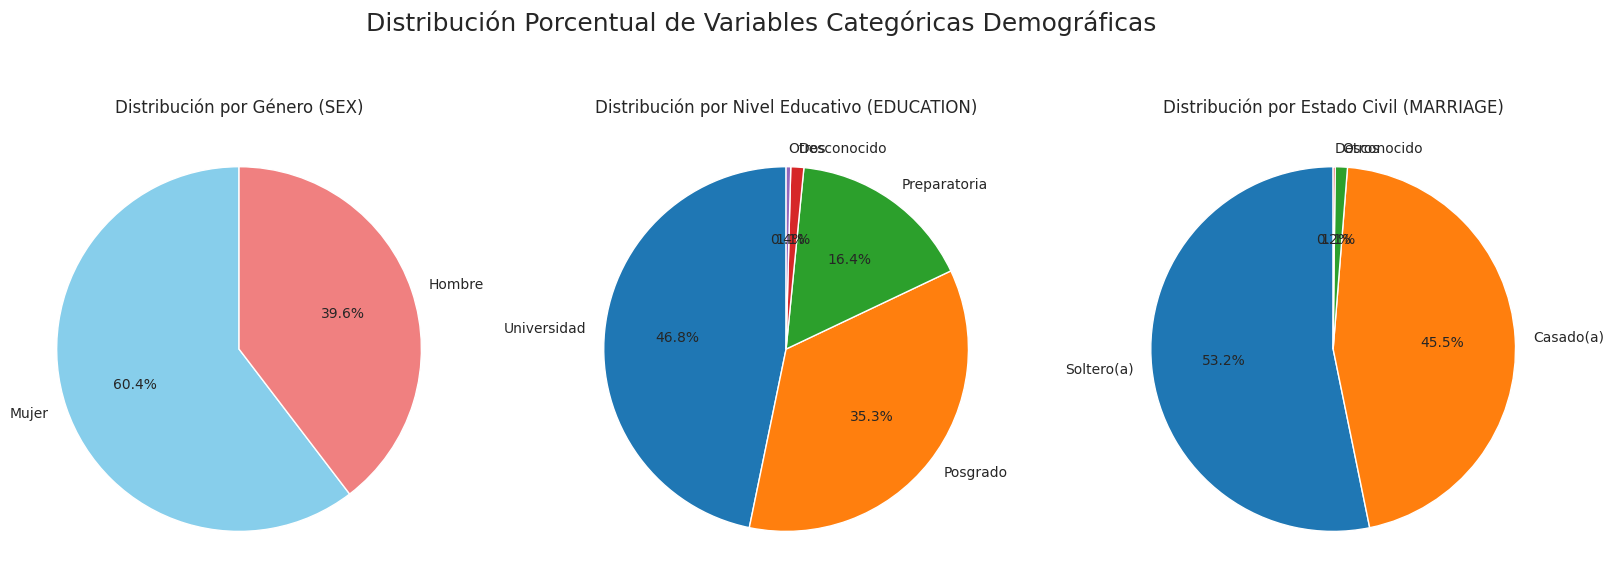

In [24]:
# --- Análisis numérico y visual de las variables demográficas ---

# 1. Análisis Numérico con .value_counts()
print("--- Análisis Numérico ---\n")
print("Distribución de la variable SEX:")
print(df_original['SEX'].value_counts())
print("\nDistribución de la variable EDUCATION:")
print(df_original['EDUCATION'].value_counts())
print("\nDistribución de la variable MARRIAGE:")
print(df_original['MARRIAGE'].value_counts())
print("\n" + "="*50 + "\n")


# 2. Análisis Visual con Gráficos de Pastel
print("--- Análisis Visual ---\n")

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Distribución Porcentual de Variables Categóricas Demográficas', fontsize=18)

# Gráfico para SEX
sex_labels = {1: 'Hombre', 2: 'Mujer'}
sex_counts = df_original['SEX'].map(sex_labels).value_counts()
axes[0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axes[0].set_title('Distribución por Género (SEX)')

# Gráfico para EDUCATION
education_labels = {1: 'Posgrado', 2: 'Universidad', 3: 'Preparatoria', 4: 'Otros', 5: 'Desconocido', 6: 'Desconocido', 0: 'Desconocido'}
education_counts = df_original['EDUCATION'].map(education_labels).value_counts()
axes[1].pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución por Nivel Educativo (EDUCATION)')

# Gráfico para MARRIAGE
marriage_labels = {1: 'Casado(a)', 2: 'Soltero(a)', 3: 'Otros', 0: 'Desconocido'}
marriage_counts = df_original['MARRIAGE'].map(marriage_labels).value_counts()
axes[2].pie(marriage_counts, labels=marriage_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Distribución por Estado Civil (MARRIAGE)')

plt.show()

### **6.2 Análisis de atributos categoricos de comportamiento (PAY_i)**


#### **6.2.1 Visualización de la Distribución de Pagos**


/tmp/ipython-input-3981521331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda, ax=axes[i], palette='viridis')
/tmp/ipython-input-3981521331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda, ax=axes[i], palette='viridis')
/tmp/ipython-input-3981521331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_eda, ax=axes[i], palette='viridis')
/tmp/ipython-input-3981521331.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

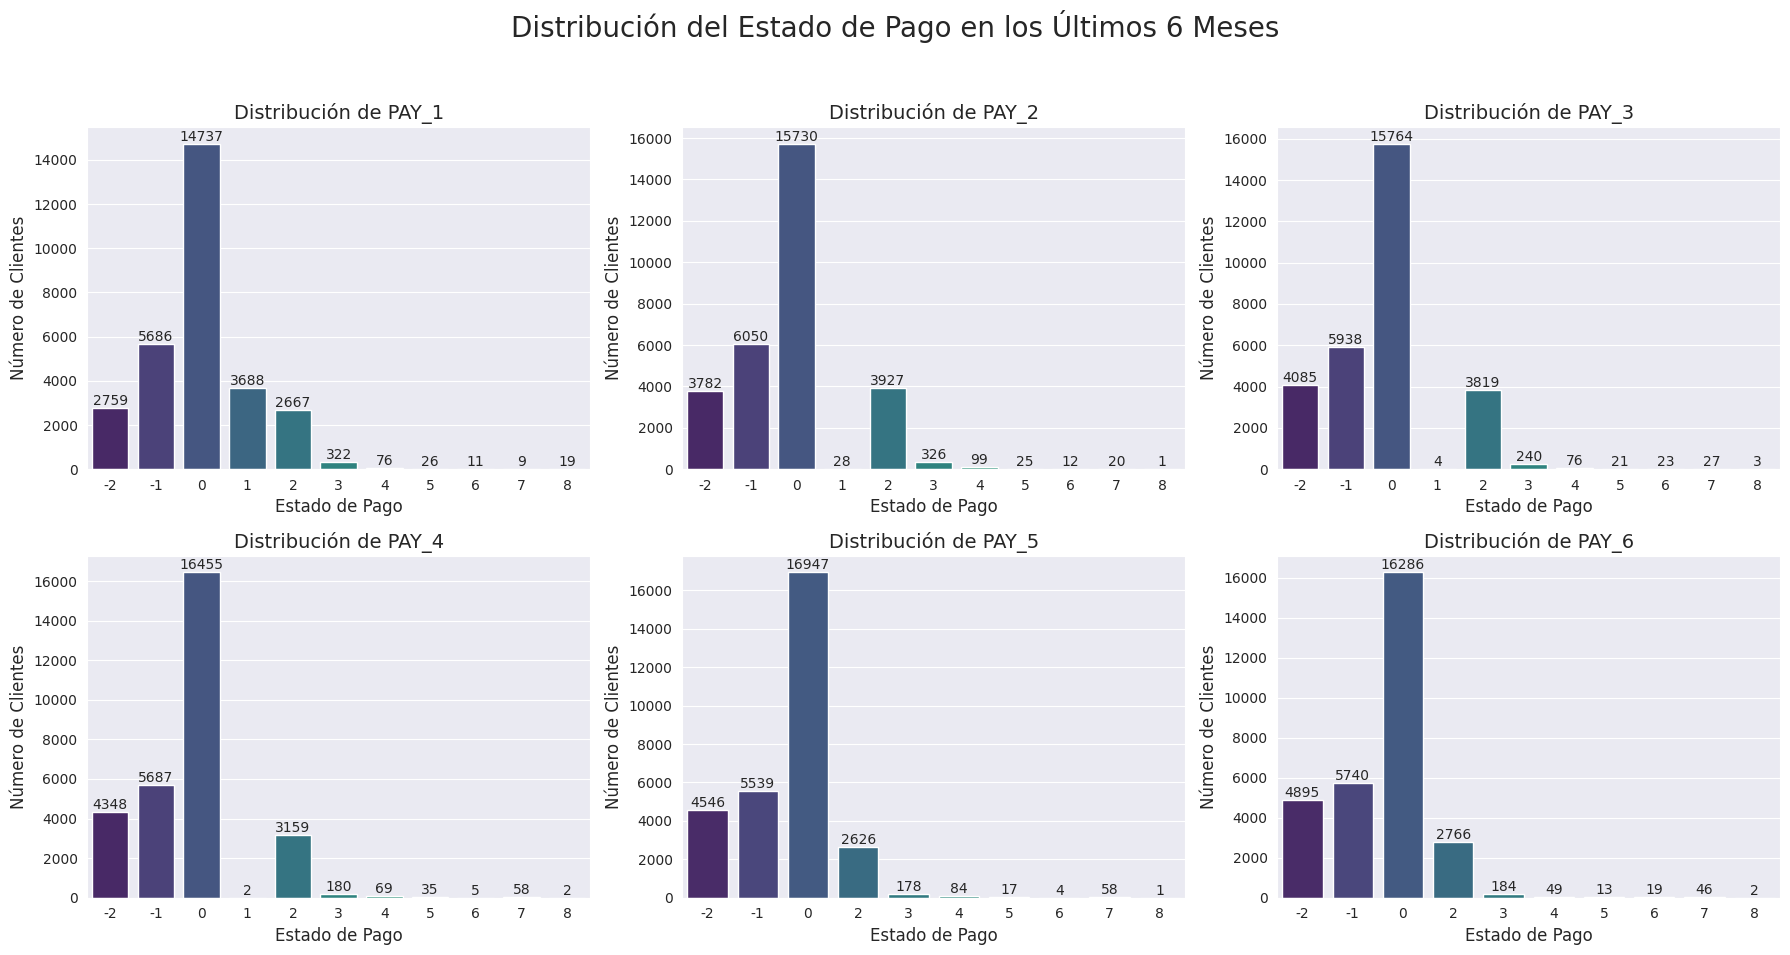

In [25]:
# --- Análisis de las Variables de Comportamiento de Pago (PAY_x) ---

# Para el EDA, es buena práctica trabajar sobre una copia para no alterar el original
df_eda = df_original.copy()

# 1. CORRECCIÓN EXPLÍCITA: Renombramos PAY_0 a PAY_1 para consistencia
df_eda.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# 2. Ahora definimos la lista de columnas con los nombres ya corregidos
pay_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# 3. Creamos la visualización usando el DataFrame corregido 'df_eda'
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución del Estado de Pago en los Últimos 6 Meses', fontsize=20)

axes = axes.flatten()

for i, col in enumerate(pay_columns):
    sns.countplot(x=col, data=df_eda, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribución de {col}', fontsize=14)
    axes[i].set_xlabel('Estado de Pago', fontsize=12)
    axes[i].set_ylabel('Número de Clientes', fontsize=12)
    # Añadimos etiquetas a las barras para mayor claridad
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **6.2.2 Observación y Formulación de Hipótesis**



Al analizar las distribuciones de pago, se observa la presencia de categorías no documentadas (-2 y 0). Dado el carácter ordinal de la variable (donde 1 es un mes de retraso y -1 es pago puntual), se formulan las siguientes hipótesis para validar el significado de cada estado:

* **Hipótesis 1 (PAY_x = 0):** Representa un pago parcial o mínimo, ya que se encuentra entre el pago puntual (-1) y el primer mes de retraso (1).

* **Hipótesis 2 (PAY_x = -1):** Representa un pago completo de la deuda del mes anterior.

* **Hipótesis 3 (PAY_x = -2):** Representa el mejor estado, probablemente una cuenta con saldo cero o sin consumo.

Para validar estas hipótesis, se realizará un experimento agrupando los datos por el estado de pago de Septiembre (PAY_1) y analizando las estadísticas de los montos de factura y pago correspondientes.

#### **6.2.3 Experimento: Validación de Hipótesis**

In [26]:
# En la Sección 3: Análisis Exploratorio de Datos (EDA)

# Renombramos PAY_0 a PAY_1 para este análisis
df_analysis = df_original.copy()
df_analysis.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# Agrupamos por el estado de pago de Septiembre (PAY_1) y describimos las variables clave:
# - PAY_AMT1: Lo que se pagó en Septiembre.
# - BILL_AMT2: Lo que se debía del mes anterior (Agosto), que es lo que se paga en Septiembre.
# - BILL_AMT1: La nueva factura generada en Septiembre.

print("Análisis de Pagos vs. Facturas según el Estado de Pago de Septiembre (PAY_1)")
payment_analysis = df_analysis.groupby('PAY_1')[['PAY_AMT1', 'BILL_AMT2', 'BILL_AMT1']].describe()

display(payment_analysis)

Análisis de Pagos vs. Facturas según el Estado de Pago de Septiembre (PAY_1)


PAY_AMT1                                                           \
         count         mean           std  min      25%     50%     75%   
PAY_1                                                                     
-2      2759.0  6477.920261  20877.338447  0.0     0.00  1131.0  5000.0   
-1      5686.0  7395.357545  22472.937316  0.0   331.25  1732.5  6035.0   
 0     14737.0  6082.560019  14132.201296  0.0  1850.00  3000.0  6000.0   
 1      3688.0  2834.042028  16493.543214  0.0     0.00     0.0  1398.5   
 2      2667.0  3567.035996   7127.222085  0.0  1000.00  2000.0  4000.0   
 3       322.0   994.350932   2082.613745  0.0     0.00     0.0  1500.0   
 4        76.0   636.500000   1659.547485  0.0     0.00     0.0     0.0   
 5        26.0   475.230769   1719.721775  0.0     0.00     0.0     0.0   
 6        11.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
 7         9.0     0.000000      0.000000  0.0     0.00     0.0     0.0   
 8        19.0     0.000000      0.000000  0.0     0.00     0.0     0.0   

                BILL_AMT2                 ...                      BILL_AMT1  \
            max     count           mean  ...        75%       max     count   
PAY_1                                     ...                                  
-2     368199.0    2759.0    8610.322581  ...    5593.00  419644.0    2759.0   
-1     873552.0    5686.0   11038.775589  ...    8942.75  481382.0    5686.0   
 0     323014.0   14737.0   74238.192509  ...   99768.00  983931.0   14737.0   
 1     505000.0    3688.0   27027.843818  ...   29554.50  491956.0    3688.0   
 2     150000.0    2667.0   64376.013498  ...   84579.00  572834.0    2667.0   
 3      17944.0     322.0   37095.590062  ...   49201.75  400246.0     322.0   
 4      10000.0      76.0   66626.184211  ...   59291.00  572677.0      76.0   
 5       8355.0      26.0   79262.730769  ...   67964.00  581775.0      26.0   
 6          0.0      11.0   83792.818182  ...  105749.50  237094.0      11.0   
 7          0.0       9.0  145712.222222  ...  238172.00  397754.0       9.0   
 8          0.0      19.0  112095.052632  ...  142080.50  469882.0      19.0   

                                                                              \
                mean            std       min       25%       50%        75%   
PAY_1                                                                          
-2       8793.052555   28224.565390  -15308.0      0.00    1179.0    5819.00   
-1      10484.795814   26287.570518   -1855.0    830.50    2739.5    8725.00   
 0      78417.889462   82054.920294     260.0  22233.00   49605.0  104691.00   
 1      27153.135846   54310.428591 -165580.0      0.00    4606.5   29206.00   
 2      64888.246719   76366.812850      37.0  17182.00   41632.0   85810.00   
 3      37820.385093   55553.410472      99.0   2500.00   18354.0   49716.25   
 4      68100.960526  103629.073120    2646.0  19133.25   31633.0   57531.00   
 5      81035.038462  124429.348876    1800.0  20464.00   39752.5   72842.75   
 6      87587.545455   68387.057761   32875.0  36810.00   71310.0  111193.50   
 7     155072.555556  129950.646133   22858.0  33816.00  126220.0  243234.00   
 8     113754.000000  130118.491254   16942.0  24329.00   43340.0  144177.50   

                 
            max  
PAY_1            
-2     478030.0  
-1     386405.0  
 0     964511.0  
 1     523618.0  
 2     613860.0  
 3     415735.0  
 4     581775.0  
 5     589654.0  
 6     254951.0  
 7     405366.0  
 8     477094.0  

[11 rows x 24 columns]

#### **6.2.4 Conclusiones y Diccionario de Datos Validado**



Los resultados del experimento validan y refinan las hipótesis. El análisis de las medias de los montos de pago (PAY_AMT1) en relación con las facturas del mes anterior (BILL_AMT2) confirma un espectro claro en el comportamiento de los clientes no morosos:

* **Estado 0 (Pago Mínimo):** Se confirma que representa un pago parcial, siendo el cumplimiento más bajo para no caer en mora.

* **Estado -1 (Pago Parcial Puntual):** Representa un pago sustancial, pero no necesariamente completo, de la deuda.

* **Estado -2 (Mejor Pagador):** Representa el comportamiento de pago más responsable, liquidando la mayor parte o la totalidad de la deuda a tiempo.

Esto nos permite construir un diccionario de datos final y validado para estas variables:

| Valor `PAY_x` | Significado Interpretado | Nivel de Riesgo para el Negocio |
| :--- | :--- | :--- |
| -2 | **Saldo Cero / Sin Consumo** | Nulo |
| -1 | **Pago Completo a Tiempo** | Muy Bajo |
| 0 | **Pago Mínimo a Tiempo** | Bajo (Cliente a observar) |
| 1 | Retraso de 1 mes | Alto |
| 2+ | Retraso de 2 o más meses | Muy Alto |

### **6.3 Análisis de Variebles Numéricas**

Se analizarán las variables numéricas para entender sus escalas, rangos y distribuciones.


#### **6.3.1 Resumen Estadistico**

In [27]:
# Seleccionamos solo las columnas que son verdaderamente numéricas/continuas
columnas_numericas = ['LIMIT_BAL', 'AGE',
                      'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Usamos .describe() solo en este subconjunto y .T para transponer la tabla
resumen_numerico = df_original[columnas_numericas].describe().T

print("Resumen estadístico de las variables verdaderamente numéricas:")
display(resumen_numerico)

Resumen estadístico de las variables verdaderamente numéricas:


,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


##### **6.3.1.1 Interpretación de Estadísticas Descriptivas**


La tabla anterior revela varias características clave de la cartera de clientes:

* **Sesgo en Variables Financieras:**
 Variables como LIMIT_BAL, BILL_AMT_i y PAY_AMT_i muestran una gran dispersión (alta std) y una media significativamente mayor que la mediana (50%), indicando un fuerte sesgo a la derecha. La mayoría de los clientes operan con montos moderados, pero unos pocos con valores muy altos influyen en el promedio.

* **Crédito a Favor:** Se observa que los montos de factura (BILL_AMT_x) tienen valores mínimos negativos. Esto indica la presencia de clientes con saldo a favor, un comportamiento atípico y de bajo riesgo que podría ser una característica predictiva importante.

* **Consistencia de Datos:** La variable AGE muestra un rango lógico (21 a 79 años), confirmando la calidad de los datos demográficos.

#### **6.3.2 Distribuciones Visuales (Histogramas)**


Histogramas de las variables numéricas para visualizar sus distribuciones:



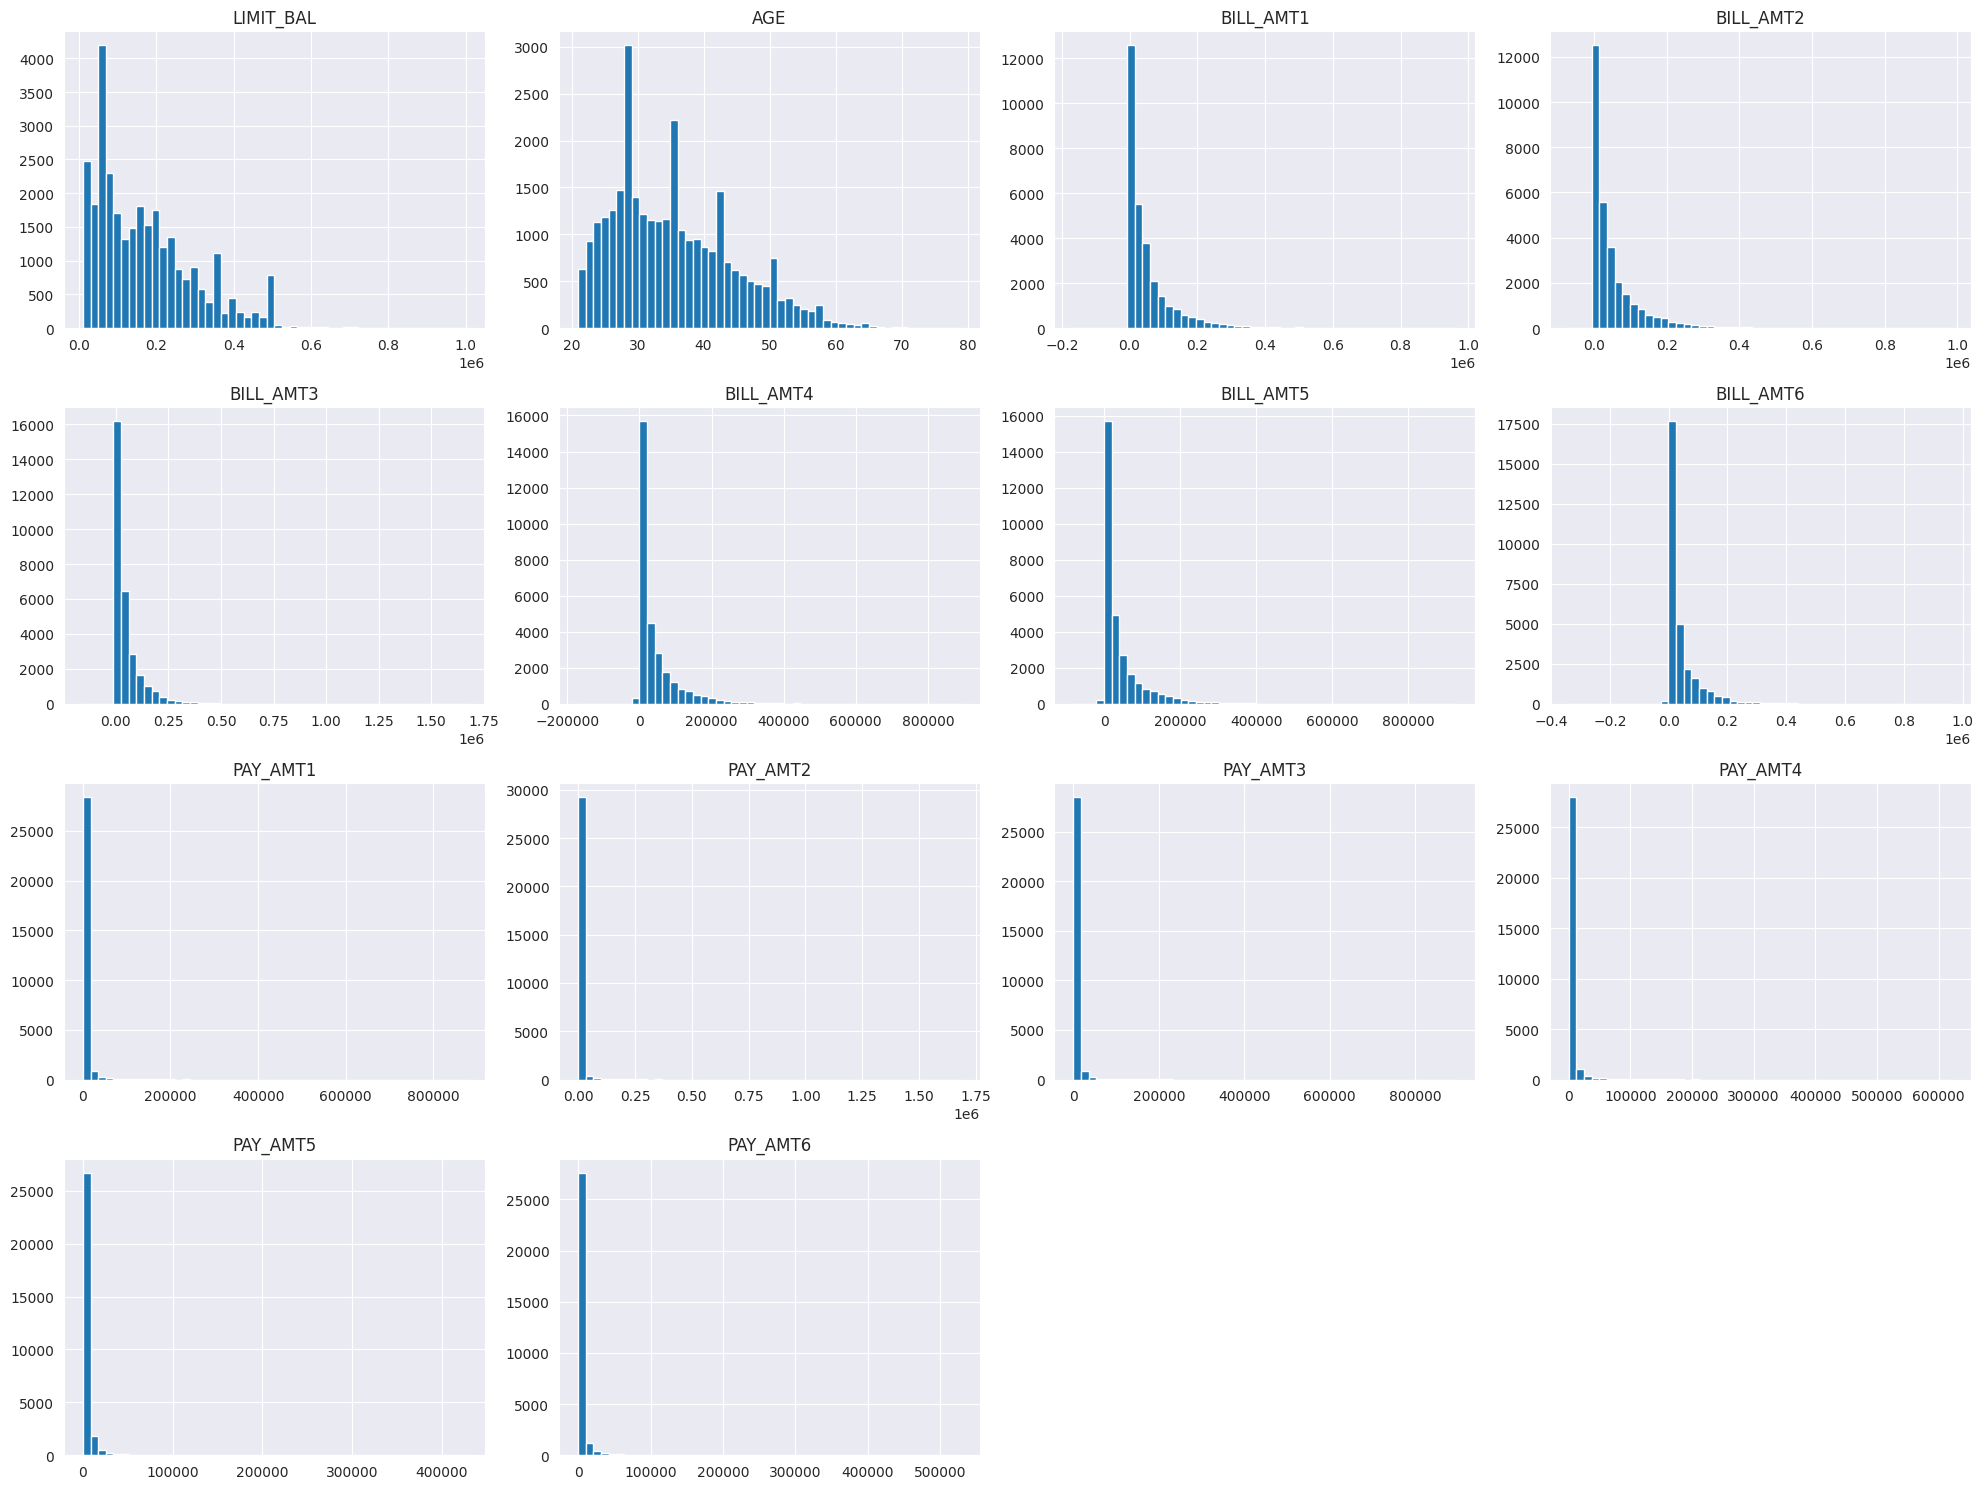

In [28]:
print("Histogramas de las variables numéricas para visualizar sus distribuciones:\n")

# Creamos los histogramas
df_original[columnas_numericas].hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

##### **6.3.2.1 Conclusiones de los Histogramas**


Los histogramas confirman visualmente el sesgo extremo en todas las variables financieras. La gran mayoría de los valores se concentran cerca de cero, con una larga cola hacia la derecha debido a valores atípicos muy altos. Esta distribución no es ideal para modelos lineales y redes neuronales, lo que sugiere la necesidad de una transformación logarítmica en la fase de preparación de datos para normalizar estas distribuciones.

### **6.4 Análisis Multivariado y de Correlaciones**


Tras analizar las variables individualmente, ahora exploraremos las relaciones entre ellas para descubrir patrones de riesgo.

#### **6.4.1 Mapa de Riesgo del Cliente**


Se combinan cuatro dimensiones (AGE, LIMIT_BAL, DEFAULT y AVG_DELAY) en un único gráfico de dispersión para obtener una visión holística del perfil de riesgo del cliente.

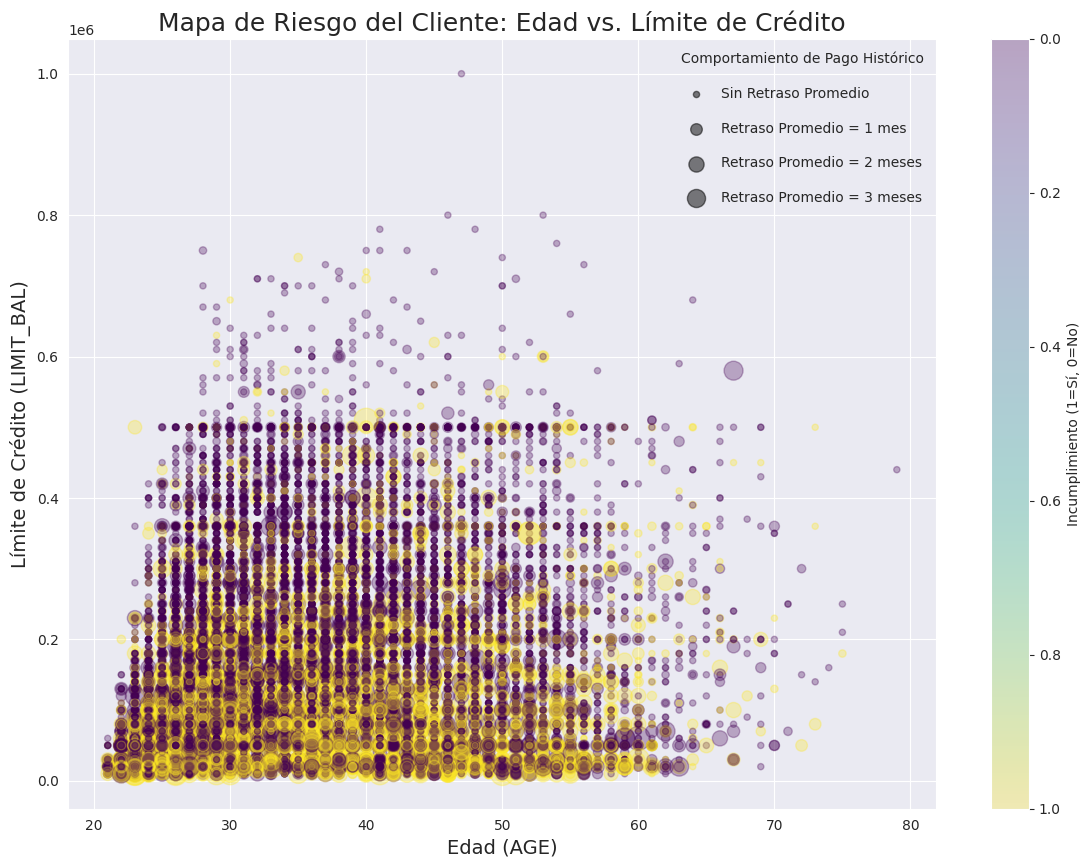

In [29]:
# --- Creación del Mapa de Riesgo del Cliente (Versión con Barra de Color Invertida) ---

# (Las primeras 2 partes del código para crear 'df_mapa' y la variable 'AVG_DELAY' son las mismas)
df_mapa = df_original.copy()
df_mapa.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_mapa['AVG_DELAY'] = df_mapa[pay_cols].clip(lower=0).mean(axis=1)

# Creación del gráfico
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    x=df_mapa['AGE'],
    y=df_mapa['LIMIT_BAL'],
    c=df_mapa['DEFAULT'],
    s=df_mapa['AVG_DELAY'] * 50 + 20,
    alpha=0.3,
    cmap='viridis'
)

# --- La Magia está Aquí: Invertir la Barra de Color ---
plt.title('Mapa de Riesgo del Cliente: Edad vs. Límite de Crédito', fontsize=18)
plt.xlabel('Edad (AGE)', fontsize=14)
plt.ylabel('Límite de Crédito (LIMIT_BAL)', fontsize=14)
plt.grid(True)

# Obtenemos el objeto de la barra de color que se creó
cbar = plt.colorbar(scatter, label='Incumplimiento (1=Sí, 0=No)')
# Invertimos el eje Y de la barra de color
cbar.ax.invert_yaxis()

# Creamos la leyenda para el tamaño con las etiquetas correctas
legend_labels = {
    0: 'Sin Retraso Promedio',
    1: 'Retraso Promedio = 1 mes',
    2: 'Retraso Promedio = 2 meses',
    3: 'Retraso Promedio = 3 meses'
}
for delay, label in legend_labels.items():
    plt.scatter([], [], c='k', alpha=0.5, s=delay * 50 + 20,
                label=label)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1.5, title='Comportamiento de Pago Histórico')

plt.show()

##### **6.4.1.1 Interpretación del Mapa de Riesgo**



El mapa revela tres hallazgos de negocio cruciales:

El Límite de Crédito como Separador de Riesgo: Los clientes que incumplen (puntos amarillos) se concentran masivamente en la zona de límites de crédito bajos (LIMIT_BAL < 200,000).

El Historial de Pagos como Predictor Dominante: Los clientes con peor historial (círculos más grandes) son casi universalmente los que incumplen.

El Riesgo Oculto: Existe un segmento de clientes con buen historial de pago (círculos pequeños) y bajo límite de crédito que, a pesar de su buen comportamiento, terminan incumpliendo. Este grupo representa un riesgo sutil que el modelo debe ser capaz de identificar.


#### **6.4.2 Segmentación del Límite de Crédito por Demografía**


Para validar si el patrón de riesgo del LIMIT_BAL se mantiene a través de diferentes segmentos demográficos, se utilizan gráficos de caja.

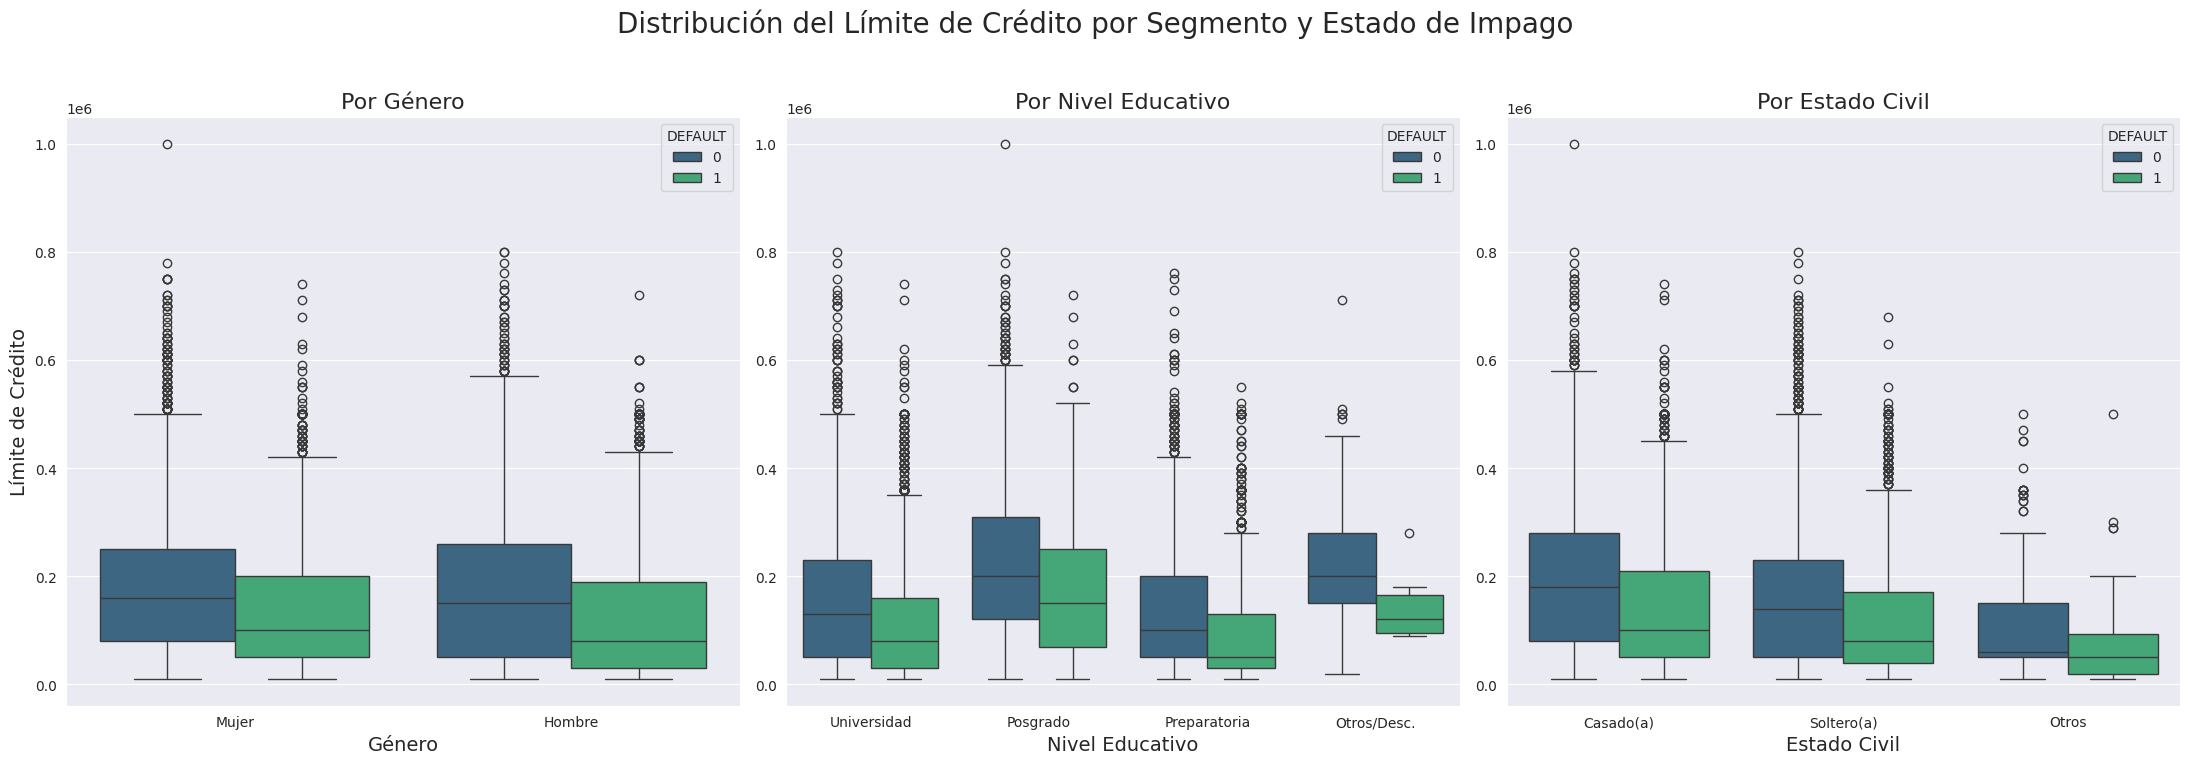

In [30]:
# En la Sección 3: Análisis Exploratorio de Datos (EDA)

# --- Análisis del Límite de Crédito por Segmentos Demográficos ---

# Hacemos una copia del df que ya tiene la columna DEFAULT y los nombres corregidos
df_segmentos = df_original.copy()
df_segmentos.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

# Mapeamos los códigos a etiquetas legibles para los gráficos
df_segmentos['SEX_desc'] = df_segmentos['SEX'].map({1: 'Hombre', 2: 'Mujer'})
df_segmentos['EDUCATION_desc'] = df_segmentos['EDUCATION'].map({1: 'Posgrado', 2: 'Universidad', 3: 'Preparatoria', 4: 'Otros/Desc.'})
df_segmentos['MARRIAGE_desc'] = df_segmentos['MARRIAGE'].map({1: 'Casado(a)', 2: 'Soltero(a)', 3: 'Otros'})


# Creamos una figura con 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Distribución del Límite de Crédito por Segmento y Estado de Impago', fontsize=20)

# 1. Boxplot para SEX
sns.boxplot(x='SEX_desc', y='LIMIT_BAL', hue='DEFAULT', data=df_segmentos, ax=axes[0], palette='viridis')
axes[0].set_title('Por Género', fontsize=16)
axes[0].set_xlabel('Género', fontsize=14)
axes[0].set_ylabel('Límite de Crédito', fontsize=14)

# 2. Boxplot para EDUCATION
sns.boxplot(x='EDUCATION_desc', y='LIMIT_BAL', hue='DEFAULT', data=df_segmentos, ax=axes[1], palette='viridis')
axes[1].set_title('Por Nivel Educativo', fontsize=16)
axes[1].set_xlabel('Nivel Educativo', fontsize=14)
axes[1].set_ylabel('')

# 3. Boxplot para MARRIAGE
sns.boxplot(x='MARRIAGE_desc', y='LIMIT_BAL', hue='DEFAULT', data=df_segmentos, ax=axes[2], palette='viridis')
axes[2].set_title('Por Estado Civil', fontsize=16)
axes[2].set_xlabel('Estado Civil', fontsize=14)
axes[2].set_ylabel('')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **6.4.2.1 Interpretación de la Segmentación**


Los gráficos de caja confirman que, independientemente del género, nivel educativo o estado civil, los clientes que incumplen (DEFAULT=1) tienen sistemáticamente límites de crédito más bajos. Esto refuerza que LIMIT_BAL es un indicador de riesgo fundamental y universal en este dataset.

#### **6.4.3 Matriz de Correlación**


Finalmente, se cuantifican las relaciones lineales entre todas las variables y, más importante, con la variable objetivo DEFAULT.

Mapa de calor de correlaciones entre las variables:



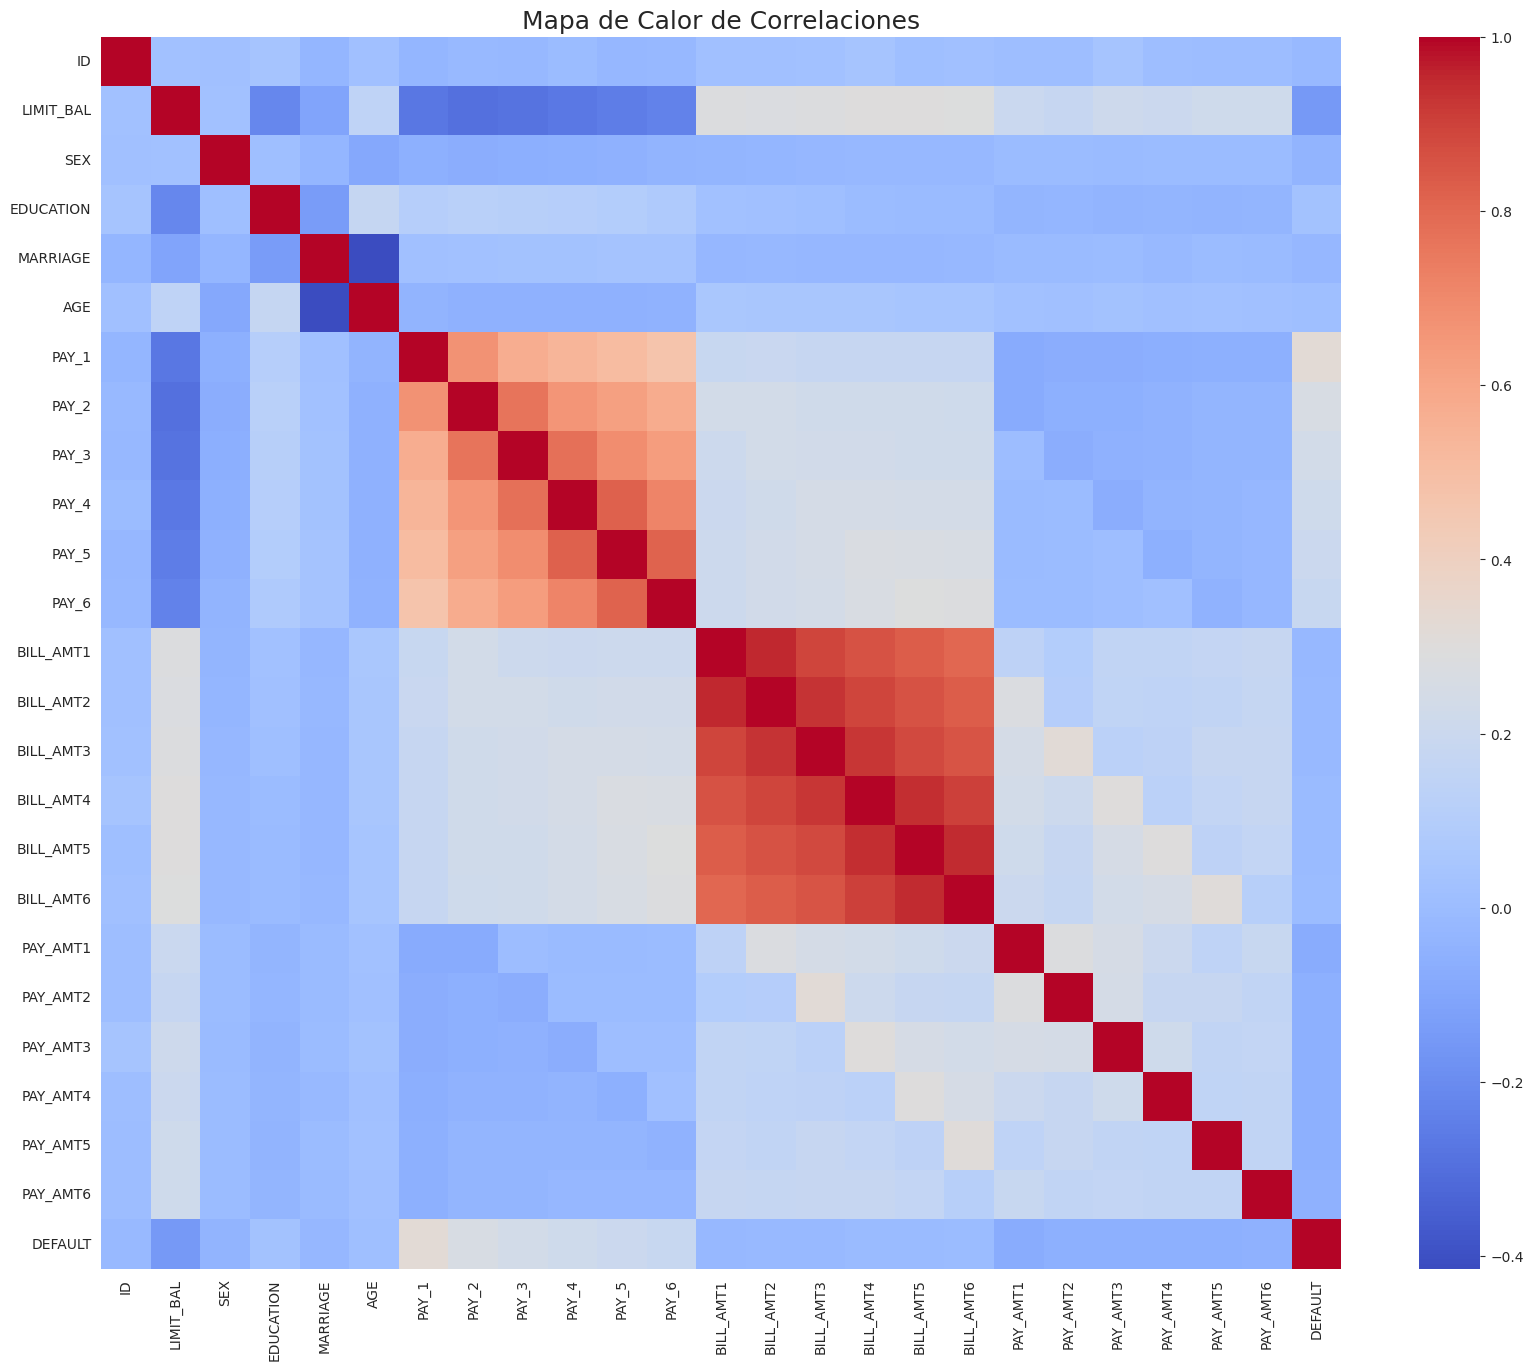


Correlación de cada variable con el objetivo (DEFAULT):



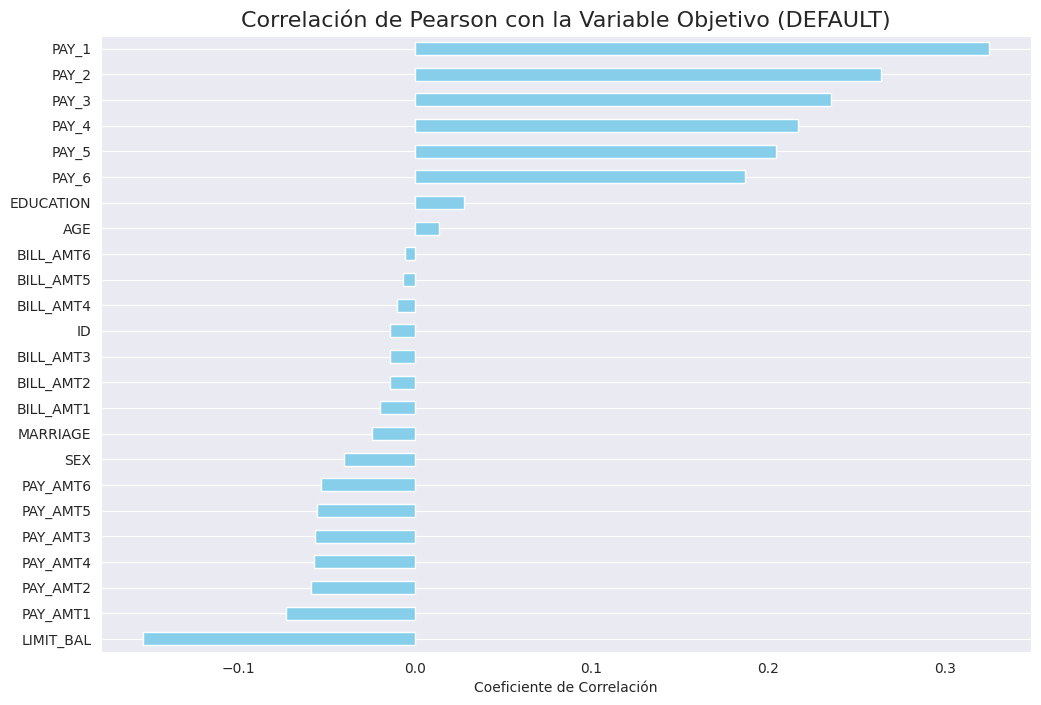

In [31]:
# En la Sección 3: Análisis Exploratorio de Datos (EDA)

# --- Análisis de Correlación ---

# Hacemos una copia y renombramos la columna objetivo para mayor claridad
df_corr = df_original.copy()
df_corr.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)
df_corr.rename(columns={'PAY_0': 'PAY_1'}, inplace=True) # Incluimos la corrección que acordamos

# --- 1. Mapa de Calor Completo ---
print("Mapa de calor de correlaciones entre las variables:\n")

# Calculamos la matriz de correlación
corr_matrix = df_corr.corr()

# Creamos la figura
plt.figure(figsize=(20, 16))

# Dibujamos el mapa de calor
sns.heatmap(corr_matrix,
            annot=False, # Ponemos False porque con tantas variables los números no se leerían bien
            cmap='coolwarm')

plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()


# --- 2. Gráfico de Barras Enfocado en el Objetivo ---
print("\nCorrelación de cada variable con el objetivo (DEFAULT):\n")

# Aislamos la correlación de todas las variables con la columna 'DEFAULT'
corr_target = corr_matrix['DEFAULT'].drop('DEFAULT')

# Creamos el gráfico de barras
plt.figure(figsize=(12, 8))
corr_target.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlación de Pearson con la Variable Objetivo (DEFAULT)', fontsize=16)
plt.xlabel('Coeficiente de Correlación')
plt.grid(axis='x')
plt.show()

##### **6.4.3.1 Conclusiones del Análisis de Correlación**


* **Predictores Principales:** El gráfico de barras confirma que las variables con mayor poder predictivo lineal son el historial de pagos (PAY_x) (correlación positiva) y el límite de crédito (LIMIT_BAL) (correlación negativa).

* **Multicolinealidad:** El mapa de calor muestra una alta correlación entre las variables BILL_AMT_x entre sí y las PAY_x entre sí, lo cual es esperado. Esto sugiere que para modelos más simples, se podrían combinar estas características (ej. usando un promedio) para reducir la redundancia.

## **7. Preparación de Datos y Feature Engineering**


Basado en los hallazgos del Análisis Exploratorio de Datos (EDA), en esta sección se realizarán las transformaciones necesarias para limpiar, estandarizar y preparar el dataset para el entrenamiento de los modelos. Cada paso se justifica con las observaciones realizadas en el EDA.



### **7.1 Limpieza y Correcciones Iniciales.**


El primer paso es aplicar las correcciones identificadas en los datos crudos para mejorar su consistencia y significado.

* **Consistencia en el Historial de Pagos:** Se observó una inconsistencia en los nombres de las columnas PAY_i, con un salto de PAY_0 a PAY_2. Para que los modelos de ML puedan interpretar correctamente la secuencia temporal y la cercanía entre los estados de pago, se renombrará PAY_0 a PAY_1.

* **Unificación de Categorías:** En el EDA se identificaron valores no documentados o redundantes en las variables EDUCATION y MARRIAGE. Estos se unificarán para crear categorías más limpias y semánticamente correctas.

In [32]:
# 1. Creacion de una copia de trabajo para todas las transformaciones
df = df_original.copy()

# --- Limpieza y Correcciones Iniciales ---

# a) Renombrar PAY_0 a PAY_1 para consistencia
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

# b) Renombrar la variable objetivo para un manejo más fácil
df.rename(columns={'default payment next month': 'DEFAULT'}, inplace=True)

# c) Unificar categorías en EDUCATION (0 y 6 se unen a 5 'Desconocido')
df['EDUCATION'] = df['EDUCATION'].replace([0, 6], 5)

# d) Unificar categorías en MARRIAGE (0 se une a 3 'Otros')
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

# --- Verificación ---
print("Columnas del DataFrame de trabajo 'df':")
print(df.columns)

print("\nCategorías finales en EDUCATION:")
print(df['EDUCATION'].value_counts().sort_index())

print("\nCategorías finales en MARRIAGE:")
print(df['MARRIAGE'].value_counts().sort_index())

Columnas del DataFrame de trabajo 'df':
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

Categorías finales en EDUCATION:
EDUCATION
1    10585
2    14030
3     4917
4      123
5      345
Name: count, dtype: int64

Categorías finales en MARRIAGE:
MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64


### **7.2 One-Hot Encoding de Variables Categóricas.**


Una vez limpios los datos, se aplica One-Hot Encoding a las variables categóricas (SEX, EDUCATION, MARRIAGE). Este paso es crucial, ya que tanto los modelos lineales como las redes neuronales podrían asignar un peso matemático incorrecto a las categorías si se les entregan como números enteros. Aunque los modelos basados en árboles de decisión son menos sensibles a esto, se aplica la transformación para homogeneizar el preprocesamiento y permitir una comparación justa entre todos los modelos.

In [33]:
# --- One-Hot Encoding de Variables Categóricas ---

print("Forma del DataFrame ANTES de One-Hot Encoding:", df.shape)
print("\nColumnas categóricas originales:")
display(df[['SEX', 'EDUCATION', 'MARRIAGE']].head())

# Aplicamos One-Hot Encoding a nuestras tres variables categóricas
df = pd.get_dummies(df,
                    columns=['SEX', 'EDUCATION', 'MARRIAGE'],
                    drop_first=True,
                    dtype=int) # Usamos dtype=int para tener 0s y 1s

print("\n---------------------------------------------------\n")

print("Forma del DataFrame DESPUÉS de One-Hot Encoding:", df.shape)
print("\nVista previa del DataFrame con las nuevas columnas:")
display(df.head())

Forma del DataFrame ANTES de One-Hot Encoding: (30000, 25)

Columnas categóricas originales:


,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1



---------------------------------------------------

Forma del DataFrame DESPUÉS de One-Hot Encoding: (30000, 29)

Vista previa del DataFrame con las nuevas columnas:


,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,DEFAULT,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,1,1,1,0,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,2000,1,1,1,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,5000,0,1,1,0,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1069,1000,0,1,1,0,0,0,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,689,679,0,0,1,0,0,0,0,0


### **7.3 División de Datos para Estrategia de Validación.**


Antes de realizar cualquier transformación que "aprenda" de los datos (como el escalado), es fundamental dividir el dataset en un conjunto de entrenamiento y uno de prueba. Esto garantiza que el conjunto de prueba permanezca "virgen" y que nuestra evaluación final del modelo sea honesta y libre de fuga de datos (data leakage).

Para el problema de clasificación, se utilizará un muestreo estratificado (stratify=y) para asegurar que la proporción de clientes morosos y no morosos sea la misma tanto en el conjunto de entrenamiento como en el de prueba, lo cual es esencial para datasets desbalanceados.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# --- División de Datos (Train/Test Split) ---
X = df.drop('DEFAULT', axis=1)
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Forma de los sets de entrenamiento:", X_train.shape, y_train.shape)
print("Forma de los sets de prueba:", X_test.shape, y_test.shape)

Forma de los sets de entrenamiento: (24000, 28) (24000,)
Forma de los sets de prueba: (6000, 28) (6000,)


### **7.4 Escalado de Características Numéricas.**


Como se observó en los histogramas del EDA, las variables numéricas tienen escalas muy diferentes y distribuciones fuertemente sesgadas con presencia de outliers. Para que modelos como la Regresión Logística, Redes Neuronales y SVMs funcionen correctamente, es necesario escalar estas características.

Se utilizará RobustScaler, ya que es resistente a los valores atípicos, a diferencia de otros escaladores como StandardScaler. El escalador se "ajustará" (fit) únicamente con los datos de entrenamiento para aprender la mediana y los cuantiles, y luego se usará para "transformar" tanto el conjunto de entrenamiento como el de prueba.

In [35]:
# --- Escalado de Características Numéricas ---

# Identificamos las columnas que escalaremos (todas menos las dummies que ya son 0/1)
columnas_a_escalar = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                      'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Creamos el escalador
scaler = RobustScaler()

# AJUSTAMOS Y TRANSFORMAMOS el set de entrenamiento
X_train[columnas_a_escalar] = scaler.fit_transform(X_train[columnas_a_escalar])

# SOLO TRANSFORMAMOS el set de prueba con el escalador ya ajustado
X_test[columnas_a_escalar] = scaler.transform(X_test[columnas_a_escalar])

# --- Verificación ---
print("\nVista previa de X_train escalado:")
display(X_train.head())


Vista previa de X_train escalado:


,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,MARRIAGE_2,MARRIAGE_3
22788,22789,0.105263,-0.076923,2.0,2.0,3.0,2.0,0.0,0.0,2.197556,...,1.235148,2.846600,1.179487,1,1,0,0,0,1,0
29006,29007,0.052632,0.000000,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,-0.351915,...,-0.402766,-0.395361,-0.384615,1,0,0,0,0,1,0
16950,16951,-0.684211,1.230769,1.0,2.0,0.0,0.0,0.0,0.0,-0.191623,...,-0.323824,-0.314971,-0.128205,0,1,0,0,0,0,0
22280,22281,0.421053,-0.384615,0.0,0.0,0.0,0.0,0.0,0.0,2.908448,...,0.886084,0.896152,1.153846,1,0,0,0,0,1,0
11346,11347,0.894737,-0.153846,1.0,-2.0,-1.0,0.0,0.0,-2.0,-0.351915,...,-0.402766,-0.395361,-0.076923,1,0,0,0,0,1,0


**Nota:** También se escalan las variables PAY_i. Aunque son ordinales, tienen una escala numérica que puede beneficiarse del escalado para ciertos modelos, mejorando la convergencia.

## **8. Modelado y Entrenamiento.**

### **8.1 Estrategia de Validación y Métricas de Evaluación.**


* **Métricas de Clasificación**

 Respecto a las métricas de los modelos de clasificación, se empleará $ROC-AUC$ como el criterio principal para decidir el modelo ganador para la predicción de nuestra variable objetivo DEFAULT. Mientras que el $F1-Score$ se utilizará sobre el modelo campeón elegido para un ajuste fino y para la toma de decisiones de negocio. La métrica $GINI$ está íntimamente relacionada con el ROC-AUC mediante la fórmula $GINI=2×(ROC-AUC)−1$, por lo que se reportará como un indicador complementario del poder de separación del modelo. Finalmente, $Accuracy$ se reportará como una métrica secundaria de referencia.

* **Métricas de Regresión.**

Para medir el error del pronóstico de flujos de caja, se empleará el _Error Cuadrático Medio Raíz (RMSE)_. Su fórmula es $RMSE(\mathbf{X},h)= \sqrt( \frac{1}{m} \sum_{i=1}^{m} (h(\mathbf{x}^{i})-y^{i})^{2} ) $
 . Se utiliza esta métrica porque da una idea clara del error típico del sistema en sus predicciones (en las mismas unidades que la variable objetivo), penalizando en mayor medida los errores grandes.


### **8.2 Proyecto de Clasificación: Predicción de DEFAULT.**


#### **8.2.1 Modelo Base: Regresión Logística.**

Entrenando el modelo de Regresión Logística...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


¡Modelo entrenado!

--- MÉTRICAS DE EVALUACIÓN ---

Accuracy (Exactitud): 0.8105
ROC-AUC Score: 0.7090
Coeficiente de GINI: 0.4180

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.25      0.37      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.61      0.63      6000
weighted avg       0.79      0.81      0.77      6000


Matriz de Confusión:


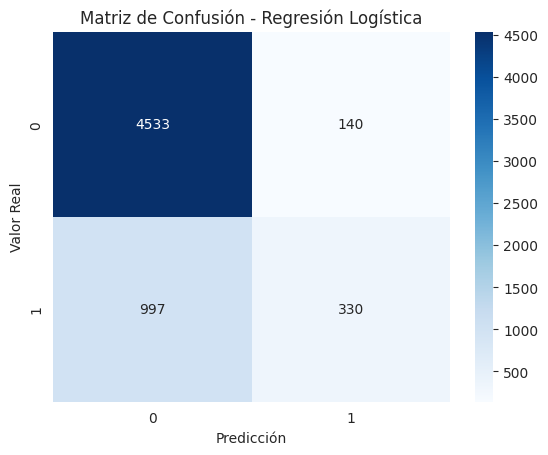


Curva ROC:


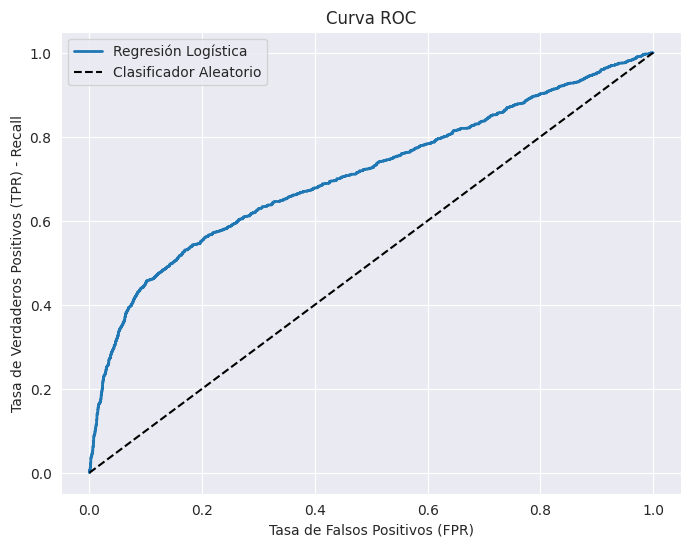

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# --- 1. Creación y Entrenamiento del Modelo ---
print("Entrenando el modelo de Regresión Logística...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
print("¡Modelo entrenado!\n")

# --- 2. Realización de Predicciones ---
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

# --- 3. Evaluación del Modelo y GUARDADO DE RESULTADOS CON NOMBRES ESPECÍFICOS ---
print("--- MÉTRICAS DE EVALUACIÓN ---\n")

# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy (Exactitud): {accuracy_log_reg:.4f}")

# ROC-AUC Score
roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg) # <-- NOMBRE CORREGIDO
print(f"ROC-AUC Score: {roc_auc_log_reg:.4f}")

# GINI
gini_log_reg = 2 * roc_auc_log_reg - 1
print(f"Coeficiente de GINI: {gini_log_reg:.4f}")

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_log_reg))

# Matriz de Confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Curva ROC
print("\nCurva ROC:")
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg) # <-- NOMBRES CORREGIDOS
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2, label='Regresión Logística')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) - Recall')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

**Análisis de Resultados**

* **Vistazo General: Poder Predictivo Existente**
El $ROC-AUC$ de 0.7090 y la curva $ROC$ asociada indican que el modelo tiene una capacidad predictiva significativamente mejor que el azar. Es un punto de partida decente para un modelo lineal simple.

* **Análisis Profundo: Un Modelo Sesgado hacia la Mayoría.**
El Reporte de Clasificación revela la principal debilidad del modelo:

  * **Clase 0 (No Incumplimiento):** Con un recall de 0.97, el modelo es excelente para identificar a los clientes que pagarán a tiempo.

  * **Clase 1 (Sí Incumplimiento):** Con un recall de solo 0.25, el modelo es muy deficiente para su tarea principal: detectar a los clientes de riesgo.

* **Conclusión Crítica para el Negocio.**
Un recall de 0.25 para la clase "Incumplimiento" significa que el modelo falla en detectar al 75% de los clientes que realmente van a incumplir. La Matriz de Confusión lo cuantifica: se le escaparon 997 clientes morosos (Falsos Negativos), lo que representa una pérdida financiera directa e inaceptable para el negocio.

* **Veredicto y Siguientes Pasos.**
Se establece el siguiente rendimiento base (Baseline):

   $ROC-AUC:$ 0.71

   $F1-Score (Clase 1):$ 0.37

   $Recall (Clase 1):$ 0.25

  El objetivo es mejorar drásticamente el Recall. La propuesta es evaluar modelos más complejos como _XGBoost_ y _Redes Neuronales_, los cuales competirán para superar este baseline al ser capaces de capturar patrones no lineales.

(Nota Técnica: El ConvergenceWarning fue observado y se tomó en cuenta al aumentar max_iter, asegurando que el resultado del baseline es representativo).
Con estos ajustes, esta sección es robusta, clara y cuenta una historia convincente.

#### **8.2.2 XGBoost Classifier**

--- MÉTRICAS DE EVALUACIÓN - XGBoost ---

Accuracy (Exactitud): 0.8072
ROC-AUC Score: 0.7577
Coeficiente de GINI: 0.5155

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      4673
           1       0.61      0.36      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Matriz de Confusión:


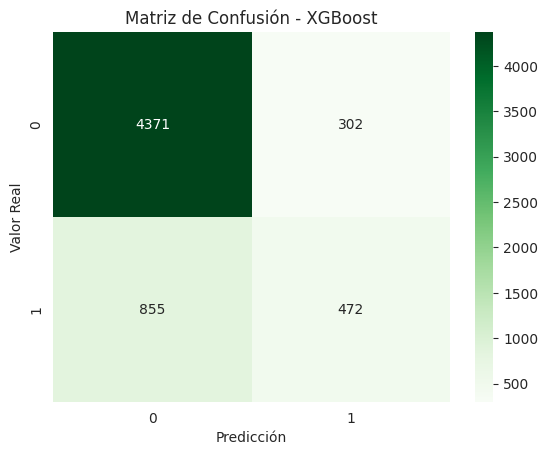


Curva ROC:


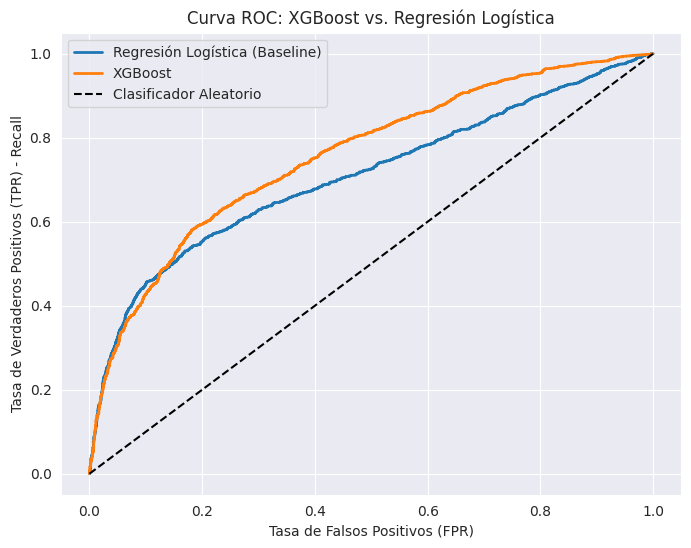

In [37]:
# --- 3. Evaluación del Modelo ---
print("--- MÉTRICAS DE EVALUACIÓN - XGBoost ---\n")

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy (Exactitud): {accuracy_xgb:.4f}")

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"ROC-AUC Score: {roc_auc_xgb:.4f}")

# GINI
gini_xgb = 2 * roc_auc_xgb - 1
print(f"Coeficiente de GINI: {gini_xgb:.4f}")

# Classification Report (Precisión, Recall, F1-Score)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de Confusión
print("\nMatriz de Confusión:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - XGBoost')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


# Curva ROC
print("\nCurva ROC:")
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))

# --- LÍNEA CORREGIDA ---
# Graficamos la curva del modelo anterior usando sus variables específicas
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2, label='Regresión Logística (Baseline)')

# Graficamos la curva del nuevo modelo
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) - Recall')
plt.title('Curva ROC: XGBoost vs. Regresión Logística')
plt.legend()
plt.grid(True)
plt.show()

**Análisis de Resultados.**

El modelo XGBoost base representa una mejora significativa sobre nuestro baseline de Regresión Logística.

* **1. Veredicto General: XGBoost Gana.**
La Curva ROC de XGBoost está consistentemente por encima de la de Regresión Logística, y el $ROC-AUC$ Score sube de 0.71 a 0.76. Esto indica un modelo con un poder de separación notablemente superior.

* **2. Hallazgo Clave para el Negocio: Mejora Drástica del Recall.**
Este es el punto más importante. El Recall para la clase de interés (incumplimiento) aumentó de 0.25 a 0.36. En términos de negocio, se pasó de capturar solo a 1 de cada 4 morosos a capturar a más de 1 de cada 3. La Matriz de Confusión lo demuestra: los costosos Falsos Negativos se redujeron de 997 a 855.

* **3. El Compromiso (Trade-Off): Precisión vs. Recall.**
Este aumento en Recall implicó una reducción en la Precisión (de 0.70 a 0.61), generando más "falsas alarmas". Sin embargo, dado que el costo de un Falso Negativo es mucho mayor, este es un compromiso aceptable. El $F1-Score$ confirma que el nuevo equilibrio es mejor, subiendo de 0.37 a 0.45.

**Conclusión y Siguientes Pasos.**
XGBoost, incluso sin ajuste, es un modelo superior. Antes de compararlo con la Red Neuronal, se procederá a optimizar sus hiperparámetros para encontrar su máximo potencial.

##### **8.2.2.1 Optimización de Hiperparámetros para XGBoost.**


En lugar de una búsqueda aleatoria, se utilizará una técnica más avanzada y eficiente llamada Optimización Bayesiana. Este método "aprende" de los resultados de cada iteración para probar combinaciones de hiperparámetros que son más prometedoras, optimizando el proceso de búsqueda.

In [38]:
# Primero, nos aseguramos de tener la librería instalada
!pip install scikit-optimize -q

from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import numpy as np

# --- Optimización de Hiperparámetros para XGBoost ---
print("Iniciando la búsqueda de los mejores hiperparámetros para XGBoost...")

# --- LA PARTE QUE FALTABA: Calcular el ratio para scale_pos_weight ---
count_class_0 = np.sum(y_train == 0)
count_class_1 = np.sum(y_train == 1)
ratio = count_class_0 / count_class_1
print(f"Ratio para scale_pos_weight calculado: {ratio:.2f}\n")
# ----------------------------------------------------------------------

# 1. Definimos el espacio de búsqueda
search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 5)
}

# 2. Creamos el objeto de búsqueda
bayes_search = BayesSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss'),
    search_spaces=search_spaces,
    n_iter=30,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# 3. Ejecutamos la búsqueda (esto puede tardar varios minutos)
bayes_search.fit(X_train, y_train)

print("\n¡Búsqueda completada!")

# --- 4. Mostramos los mejores resultados ---
print("\nMejores hiperparámetros encontrados:")
print(bayes_search.best_params_)
print(f"\nMejor score ROC-AUC (validación cruzada): {bayes_search.best_score_:.4f}")

# --- 5. Evaluamos el MEJOR modelo en el conjunto de prueba ---
print("\n--- MÉTRICAS DE EVALUACIÓN - XGBoost Optimizado ---\n")
best_xgb_clf = bayes_search.best_estimator_
y_pred_best_xgb = best_xgb_clf.predict(X_test)
y_proba_best_xgb = best_xgb_clf.predict_proba(X_test)[:, 1]

# Re-calculamos todas las métricas con el modelo optimizado
print(classification_report(y_test, y_pred_best_xgb))
print(f"ROC-AUC final en Test: {roc_auc_score(y_test, y_proba_best_xgb):.4f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.3 MB/s eta 0:00:00
Iniciando la búsqueda de los mejores hiperparámetros para XGBoost...
Ratio para scale_pos_weight calculado: 3.52



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:37:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



¡Búsqueda completada!

Mejores hiperparámetros encontrados:
OrderedDict({'colsample_bytree': 0.5769082884235329, 'gamma': 4.481632421985051, 'learning_rate': 0.0101844167403023, 'max_depth': 6, 'n_estimators': 466, 'subsample': 0.9133876942692345})

Mejor score ROC-AUC (validación cruzada): 0.7837

--- MÉTRICAS DE EVALUACIÓN - XGBoost Optimizado ---

              precision    recall  f1-score   support

           0       0.88      0.81      0.85      4673
           1       0.48      0.61      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.78      6000

ROC-AUC final en Test: 0.7818


#### **8.2.3 Análisis del Modelo Optimizado y Veredicto Final.**


La optimización de hiperparámetros mediante Búsqueda Bayesiana ha sido un éxito rotundo, mejorando significativamente el rendimiento de nuestro ya potente modelo XGBoost.

* **Éxito en la Optimización:** La búsqueda encontró una combinación de hiperparámetros superior, logrando un $ROC-AUC$ de 0.7837 en la validación cruzada, lo que se tradujo en un rendimiento final en el conjunto de prueba de 0.7818.

* **Mejora en Métricas Clave (vs. XGBoost Base):**

   * $ROC-AUC:$ Mejoró de 0.7577 a 0.7818.

   * $F1-Score (Clase 1):$ Mejoró de 0.45 a 0.54.

   * $Recall (Clase 1):$ ¡La mejora más importante! Aumentó drásticamente de 0.36 a 0.61.

* **Impacto Decisivo para el Negocio:**
El aumento del Recall al 61% es un cambio radical. Hemos pasado de un modelo que se le escapaban casi dos tercios de los clientes de riesgo, a un modelo que identifica correctamente a más de 6 de cada 10 morosos. Esta es una mejora con un impacto financiero directo y muy significativo. A cambio, la Precisión bajó a 0.48, un compromiso aceptable para maximizar la detección de riesgo.

* **Veredicto Final (Clasificación):**
El modelo XGBoost Optimizado es declarado el campeón definitivo para la tarea de clasificación. Su superioridad ha sido demostrada tanto en su poder predictivo general (ROC-AUC) como en su capacidad para cumplir el objetivo de negocio clave (alto Recall), sin embargo, falta realizar un analisis con un clasificador de Redes Neuronales.


#### **8.2.4 Modelo Correspondiente Final: Red Nueronal**

Para asegurar que hemos explorado las alternativas más potentes, se entrenará un Perceptrón Multicapa (MLP) como contendiente final. Dada la naturaleza desbalanceada del dataset, es crucial aplicar class_weight durante el entrenamiento para forzar al modelo a prestar atención a la clase minoritaria (incumplimiento).

In [43]:
# --- Código COMPLETO y FINAL para la Red Neuronal ---
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.utils import class_weight
import numpy as np

# 1. Creación y Compilación del Modelo
# ... (esta parte es correcta, la dejamos como está) ...
print("Construyendo el modelo de Red Neuronal...")
nn_clf = keras.Sequential([
    keras.layers.Input(shape=[X_train.shape[1]]),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation="sigmoid")
])
nn_clf.compile(loss="binary_crossentropy",
               optimizer=keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy", tf.keras.metrics.AUC(name='roc_auc')])
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_roc_auc', mode='max')
print("¡Modelo construido y compilado!\n")

# 2. Cálculo de Pesos
# ... (esta parte es correcta) ...
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
print("Pesos calculados para el entrenamiento:", class_weights_dict)

# 3. Entrenamiento del Modelo
# ... (esta parte es correcta) ...
print("\nEntrenando la Red Neuronal con class_weight...")
history = nn_clf.fit(X_train, y_train,
                     epochs=100,
                     validation_data=(X_test, y_test),
                     callbacks=[early_stopping_cb],
                     class_weight=class_weights_dict,
                     verbose=1)
print("\n¡Modelo entrenado!\n")

# 4. Evaluación del Modelo (CON LA LÍNEA AÑADIDA)
print("--- MÉTRICAS DE EVALUACIÓN - Red Neuronal ---")
y_proba_nn = nn_clf.predict(X_test)
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# --- INICIO DE LA CORRECCIÓN ---
# Calculamos las métricas
accuracy_nn = accuracy_score(y_test, y_pred_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

# ¡AÑADIMOS LA LÍNEA QUE FALTABA PARA CALCULAR LOS PUNTOS DE LA CURVA!
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_proba_nn)
# --- FIN DE LA CORRECCIÓN ---

gini_nn = 2 * roc_auc_nn - 1
print(f"Accuracy (Exactitud): {accuracy_nn:.4f}")
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")
print(f"Coeficiente de GINI: {gini_nn:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nn, zero_division=0))

Construyendo el modelo de Red Neuronal...
¡Modelo construido y compilado!

Pesos calculados para el entrenamiento: {0: np.float64(0.6420202236370446), 1: np.float64(2.2603126765869277)}

Entrenando la Red Neuronal con class_weight...
Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4970 - loss: 530.9276 - roc_auc: 0.4978 - val_accuracy: 0.2213 - val_loss: 0.7199 - val_roc_auc: 0.4915
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3908 - loss: 2.8304 - roc_auc: 0.5053 - val_accuracy: 0.2213 - val_loss: 0.7063 - val_roc_auc: 0.5005
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3093 - loss: 1.6731 - roc_auc: 0.4996 - val_accuracy: 0.2213 - val_loss: 0.7033 - val_roc_auc: 0.5001
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2690 - loss: 1.1037 - roc_auc: 0.4997 - val_accuracy: 0.2213 - val_loss: 0.6940 - val_roc_auc: 0.5001
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2482 - loss: 0.8328 -

##### **8.2.4.1Análisis de Resultados.**


Los resultados tras el re-entrenamiento con class_weight confirman la dificultad de la Red Neuronal para este problema específico. El modelo, en un intento por evitar los costosos errores en la clase minoritaria (1), ha girado hacia el extremo opuesto:

* **Comportamiento Extremo:** La matriz de confusión muestra que el modelo ahora clasifica a casi todos los clientes como morosos (DEFAULT=1). Esto resulta en un Recall perfecto de 1.00 para la clase de riesgo, pero a costa de un Recall de 0.00 para la clase de no-riesgo.

* **Rendimiento No Competitivo:** El $ROC-AUC$ de 0.5005 es equivalente a un clasificador aleatorio. El modelo no ha aprendido a distinguir entre las clases, simplemente ha aprendido que la estrategia de menor penalización es predecir siempre la clase 1.

* **Conclusión:**
Este experimento es muy valioso, ya que demuestra que para este conjunto de datos tabulares, el modelo XGBoost es inherentemente superior y más robusto. Mientras que la Red Neuronal requiere un ajuste significativamente más complejo de su arquitectura y hiperparámetros para manejar el desbalanceo, XGBoost ofrece un rendimiento excelente y más estable "desde el principio".

Por lo tanto, se confirma la decisión de descartar la Red Neuronal y proceder con el XGBoost Optimizado como nuestro modelo campeón para la tarea de clasificación.Sin embargo para una mejor expresion de los resultados se dara un interpretación visual.

#### **8.2.5 Curvas y Tablas comparativas (Clasificación)**



Habiendo entrenado y evaluado todos los modelos contendientes, se procede a una comparación final para declarar al modelo campeón.


##### **8.2.5.1 Curva $ROC$ Comparativa.**


La siguiente gráfica superpone las curvas $ROC$ de todos los modelos entrenados. Una curva más cercana a la esquina superior izquierda indica un mejor rendimiento general.

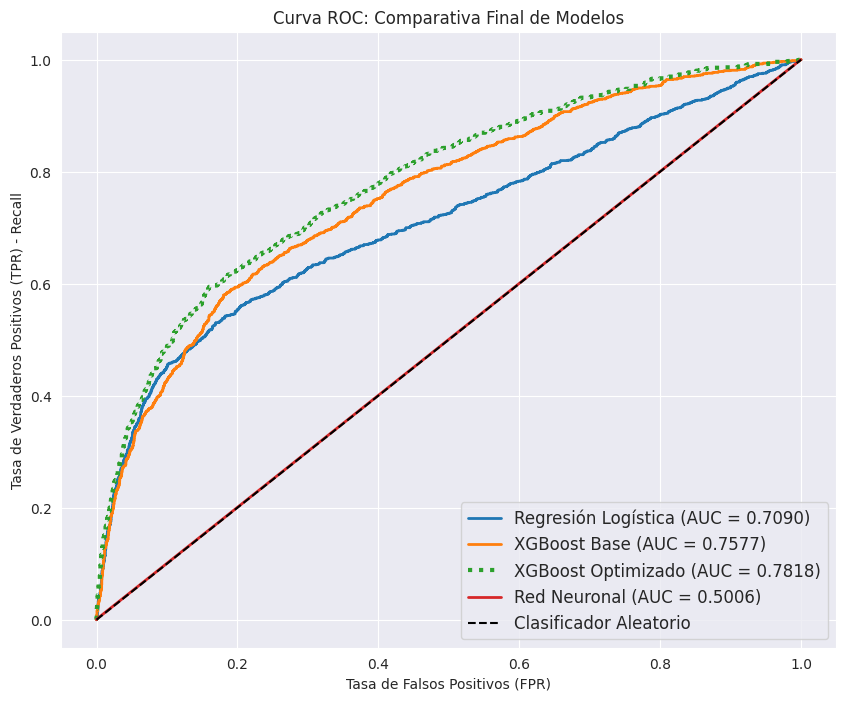

In [44]:
# --- Gráfico Comparativo Final de Curvas ROC ---
plt.figure(figsize=(10, 8))

# Modelo Baseline
plt.plot(fpr_log_reg, tpr_log_reg, linewidth=2, label=f'Regresión Logística (AUC = {roc_auc_log_reg:.4f})')

# Modelo XGBoost sin optimizar
plt.plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost Base (AUC = {roc_auc_xgb:.4f})')

# Modelo XGBoost Optimizado
y_proba_best_xgb = best_xgb_clf.predict_proba(X_test)[:, 1]
fpr_best_xgb, tpr_best_xgb, _ = roc_curve(y_test, y_proba_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, y_proba_best_xgb)
plt.plot(fpr_best_xgb, tpr_best_xgb, linewidth=3, linestyle=':', label=f'XGBoost Optimizado (AUC = {roc_auc_best_xgb:.4f})')


# Modelo de Red Neuronal (para mostrar el proceso completo)
plt.plot(fpr_nn, tpr_nn, linewidth=2, label=f'Red Neuronal (AUC = {roc_auc_nn:.4f})')

# Clasificador Aleatorio
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador Aleatorio')

# Estilo y etiquetas
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR) - Recall')
plt.title('Curva ROC: Comparativa Final de Modelos')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

##### **8.2.5.2 Tabla Comparativa  de Metricas**

La siguiente tabla resume el rendimiento de cada modelo en las métricas clave. El mejor resultado de cada columna se resalta en verde.

In [45]:
# --- Tabla Resumen de Resultados ---
from sklearn.metrics import f1_score, recall_score, precision_score

# Creamos un diccionario para almacenar todas nuestras métricas
summary = {
    "Modelo": ["Regresión Logística", "XGBoost Base", "XGBoost Optimizado", "Red Neuronal (Fallido)"],
    "ROC-AUC": [
        roc_auc_log_reg,
        roc_auc_xgb,
        roc_auc_best_xgb,
        roc_auc_nn
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_best_xgb),
        accuracy_score(y_test, y_pred_nn)
    ],
    "F1-Score (Clase 1)": [
        f1_score(y_test, y_pred_log_reg, pos_label=1),
        f1_score(y_test, y_pred_xgb, pos_label=1),
        f1_score(y_test, y_pred_best_xgb, pos_label=1),
        f1_score(y_test, y_pred_nn, pos_label=1)
    ],
    "Recall (Clase 1)": [
        recall_score(y_test, y_pred_log_reg, pos_label=1),
        recall_score(y_test, y_pred_xgb, pos_label=1),
        recall_score(y_test, y_pred_best_xgb, pos_label=1),
        recall_score(y_test, y_pred_nn, pos_label=1)
    ],
    "Precision (Clase 1)": [
        precision_score(y_test, y_pred_log_reg, pos_label=1),
        precision_score(y_test, y_pred_xgb, pos_label=1),
        precision_score(y_test, y_pred_best_xgb, pos_label=1),
        precision_score(y_test, y_pred_nn, pos_label=1, zero_division=0)
    ]
}

# Convertimos el diccionario a un DataFrame de Pandas
summary_df = pd.DataFrame(summary).set_index("Modelo")
# Calculamos el GINI
summary_df["GINI"] = 2 * summary_df["ROC-AUC"] - 1
# Usamos estilo para resaltar los mejores valores en cada columna
styled_summary = summary_df.style.highlight_max(color='lightgreen', axis=0).format("{:.4f}")
print("Tabla Comparativa de Rendimiento de Modelos de Clasificación:")
display(styled_summary)

Tabla Comparativa de Rendimiento de Modelos de Clasificación:


,ROC-AUC,Accuracy,F1-Score (Clase 1),Recall (Clase 1),Precision (Clase 1),GINI
Modelo,,,,,,
Regresión Logística,0.7090,0.8105,0.3673,0.2487,0.7021,0.4180
XGBoost Base,0.7577,0.8072,0.4493,0.3557,0.6098,0.5155
XGBoost Optimizado,0.7818,0.7698,0.5404,0.6119,0.4839,0.5637
Red Neuronal (Fallido),0.5006,0.2213,0.3623,1.0000,0.2212,0.0012


#### **8.2.6 Veredicto Final y Conclusiones de Negocio.**




El modelo XGBoost Optimizado es el ganador indiscutible. La tabla y el gráfico comparativo confirman su superioridad:

* **Poder Predictivo $(ROC-AUC)$:** Alcanzó un ROC-AUC de 0.7818, demostrando el mejor poder de separación entre clases.

* **Impacto de Negocio (Recall):** Logró un Recall de 0.61 para la clase de interés (incumplimiento). Esto significa que es capaz de identificar correctamente a más de 6 de cada 10 clientes morosos, una mejora masiva sobre el baseline.

* **Equilibrio (F1-Score):** Con un F1-Score de 0.54, ofrece el mejor compromiso entre la detección de riesgo (Recall) y la minimización de "falsas alarmas" (Precisión).

**Conclusión para la Tarea de Clasificación:**
Se ha completado exitosamente el proyecto de clasificación. Se siguió un proceso riguroso para construir, evaluar, optimizar y seleccionar el mejor modelo, justificando la elección final con métricas alineadas a los objetivos de negocio.


### **8.3 Proyecto de Regresión: Predicción de `PAY_AMT4`**


Para la predicción de la variable $PAY_AMT4$, se evaluarán tres modelos de regresión. Como punto de partida, se implementará un modelo de _Regresión Lineal Múltiple_ que servirá como nuestro baseline. La simplicidad y velocidad de este modelo nos permitirá establecer un rendimiento base en las métricas de $R^{2}$
  y $RMSE$, que los modelos más complejos (_XGBoost_ y _Random Forest_) deberán superar.


#### **8.3.1 Modelo Base: Regresión Lineal Múltiple**


Previo al modelado, es crucial realizar una preparación de datos específica para esta tarea. La variable objetivo, **PAY_AMT4**, representa el monto pagado en junio de 2005, el cual corresponde a la liquidación de la factura generada en mayo **(BILL_AMT5)**. Por lo tanto, para evitar la fuga de datos (_data leakage_), es imperativo excluir del conjunto de características predictoras cualquier información de meses posteriores a junio (es decir, los datos de julio, agosto y septiembre).

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- 1. Preparación Específica para la Regresión (SIN FUGA DE DATOS) ---
print("Preparando datos para la regresión...")
df_reg = df.copy()
columnas_futuras = [
    'PAY_1', 'PAY_2', 'PAY_3',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3'
]
df_reg = df_reg.drop(columns=columnas_futuras)
print("DataFrame para regresión creado. Forma:", df_reg.shape)

# --- 2. División y Escalado de Datos ---
X_reg = df_reg.drop(['PAY_AMT4', 'ID'], axis=1)
y_reg = df_reg['PAY_AMT4']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
columnas_a_escalar_reg = ['LIMIT_BAL', 'AGE', 'PAY_4', 'PAY_5', 'PAY_6',
                          'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                          'PAY_AMT5', 'PAY_AMT6']
scaler_reg = RobustScaler()
X_train_reg[columnas_a_escalar_reg] = scaler_reg.fit_transform(X_train_reg[columnas_a_escalar_reg])
X_test_reg[columnas_a_escalar_reg] = scaler_reg.transform(X_test_reg[columnas_a_escalar_reg])

# --- 3. Entrenamiento y Evaluación del Modelo ---
print("\nEntrenando el modelo de Regresión Lineal...")
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
print("¡Modelo entrenado!")
y_pred_lin_reg = lin_reg.predict(X_test_reg)
rmse_lin_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_lin_reg))
r2_lin_reg = r2_score(y_test_reg, y_pred_lin_reg)

print("\n--- MÉTRICAS DE EVALUACIÓN - Regresión Lineal ---\n")
print(f"RMSE (Error Cuadrático Medio Raíz): {rmse_lin_reg:.2f}")
print(f"R² (Coeficiente de Determinación): {r2_lin_reg:.4f}")

Preparando datos para la regresión...
DataFrame para regresión creado. Forma: (30000, 20)

Entrenando el modelo de Regresión Lineal...
¡Modelo entrenado!

--- MÉTRICAS DE EVALUACIÓN - Regresión Lineal ---

RMSE (Error Cuadrático Medio Raíz): 10816.36
R² (Coeficiente de Determinación): 0.2854


##### **8.3.1.1 Análisis de los Resultados del Modelo Base**

El rendimiento del modelo lineal es deficiente, como se esperaba:

* **$R²$ (0.2854):** El modelo solo explica el 28.5% de la variabilidad en los montos de pago.

* **$RMSE$ (10,816.36):** En promedio, las predicciones se desvían más de $10,800, un error demasiado alto para ser útil en un entorno de negocio.

Para reforzar estos resultados, el siguiente gráfico de dispersión compara los valores reales con los predichos. Una predicción perfecta se alinearía en la diagonal roja. La "nube" de puntos dispersa confirma visualmente el bajo rendimiento y justifica la necesidad de modelos más potentes.

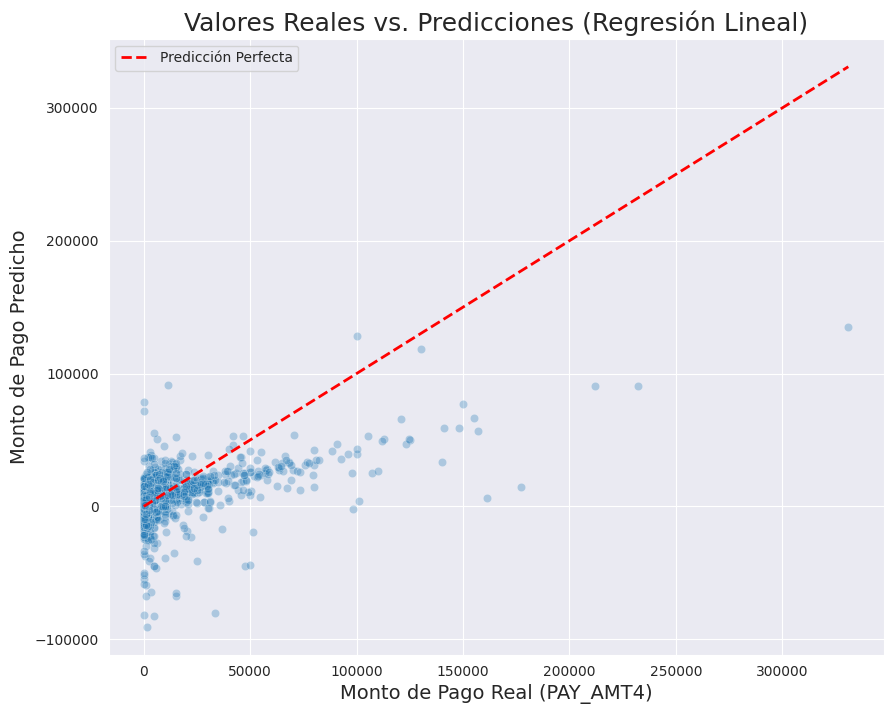

In [47]:
# --- Visualización del Rendimiento de la Regresión Lineal ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_reg, y=y_pred_lin_reg, alpha=0.3)
plt.plot([0, y_test_reg.max()], [0, y_test_reg.max()], 'r--', linewidth=2, label='Predicción Perfecta')
plt.title('Valores Reales vs. Predicciones (Regresión Lineal)', fontsize=18)
plt.xlabel('Monto de Pago Real (PAY_AMT4)', fontsize=14)
plt.ylabel('Monto de Pago Predicho', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()



#### **8.3.2 Competencia de Modelos de Ensamblaje: RandomForest vs. XGBoost**


A continuación, se entrenan y evalúan dos modelos de ensamblaje basados en árboles (Random Forest y XGBoost) para superar el baseline. El código consolida el entrenamiento y la evaluación para una comparación directa.

Entrenando el modelo Random Forest Regressor...
¡Entrenamiento de Random Forest completado!

Entrenando el modelo XGBoost Regressor...
¡Entrenamiento de XGBoost completado!

--- RESUMEN DE MÉTRICAS (Regresión) ---

Modelo Base (Regresión Lineal):
  - RMSE: 10816.36
  - R²:   0.2854

Random Forest:
  - RMSE: 5750.76
  - R²:   0.7980

XGBoost:
  - RMSE: 6436.10
  - R²:   0.7470



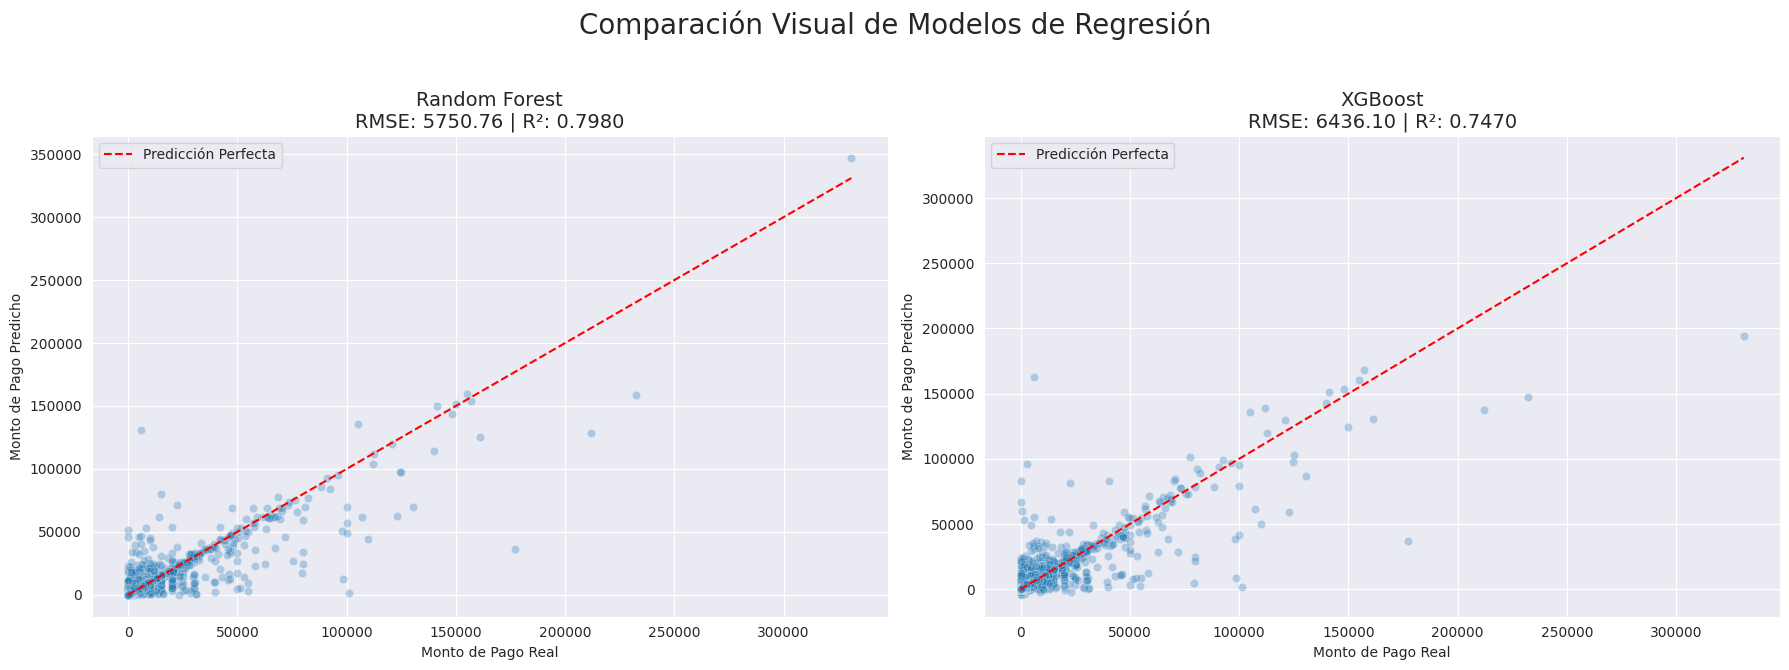

In [48]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Contendiente 1: Random Forest Regressor ---
print("Entrenando el modelo Random Forest Regressor...")
rf_reg = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)
rmse_rf_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_rf_reg))
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)
print("¡Entrenamiento de Random Forest completado!\n")


# --- Contendiente 2: XGBoost Regressor ---
print("Entrenando el modelo XGBoost Regressor...")
xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)
rmse_xgb_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))
r2_xgb_reg = r2_score(y_test_reg, y_pred_xgb_reg)
print("¡Entrenamiento de XGBoost completado!\n")


# --- Resumen Comparativo de Métricas ---
print("--- RESUMEN DE MÉTRICAS (Regresión) ---\n")
print(f"Modelo Base (Regresión Lineal):")
print(f"  - RMSE: {rmse_lin_reg:.2f}")
print(f"  - R²:   {r2_lin_reg:.4f}\n")

print(f"Random Forest:")
print(f"  - RMSE: {rmse_rf_reg:.2f}")
print(f"  - R²:   {r2_rf_reg:.4f}\n")

print(f"XGBoost:")
print(f"  - RMSE: {rmse_xgb_reg:.2f}")
print(f"  - R²:   {r2_xgb_reg:.4f}\n")


# --- Visualización Comparativa ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Comparación Visual de Modelos de Regresión', fontsize=20)

# Gráfico para Random Forest
sns.scatterplot(x=y_test_reg, y=y_pred_rf_reg, alpha=0.3, ax=axes[0])
axes[0].plot([0, y_test_reg.max()], [0, y_test_reg.max()], 'r--', label='Predicción Perfecta')
axes[0].set_title(f'Random Forest\nRMSE: {rmse_rf_reg:.2f} | R²: {r2_rf_reg:.4f}', fontsize=14)
axes[0].set_xlabel('Monto de Pago Real')
axes[0].set_ylabel('Monto de Pago Predicho')
axes[0].legend()
axes[0].grid(True)

# Gráfico para XGBoost
sns.scatterplot(x=y_test_reg, y=y_pred_xgb_reg, alpha=0.3, ax=axes[1])
axes[1].plot([0, y_test_reg.max()], [0, y_test_reg.max()], 'r--', label='Predicción Perfecta')
axes[1].set_title(f'XGBoost\nRMSE: {rmse_xgb_reg:.2f} | R²: {r2_xgb_reg:.4f}', fontsize=14)
axes[1].set_xlabel('Monto de Pago Real')
axes[1].set_ylabel('Monto de Pago Predicho')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### **8.3.2.1 Análisis Comparativo y Veredicto (Regresión)**




El resumen de métricas y los gráficos comparativos demuestran que ambos modelos de ensamblaje superan masivamente a la Regresión Lineal.

* **Random Forest:** Con un $RMSE$ de 5750.76 y un $R²$ de 0.7980, es el ganador indiscutible de esta contienda. Ha logrado reducir el error promedio casi a la mitad y explicar casi el 80% de la varianza de los datos.

* **XGBoost:** Aunque también presenta un rendimiento excelente ($RMSE$: 6436.10, $R²$: 0.7470), no supera a Random Forest en esta primera iteración con parámetros por defecto.

* **Veredicto Final (Regresión):**
El modelo Random Forest es declarado el campeón para la tarea de regresión. Su superioridad ha sido demostrada tanto en la reducción del error $(RMSE)$ como en su capacidad para explicar la variabilidad de los datos $(R²)$.

## **9. Conclusiones y Próximos Pasos**




En esta sección se consolidan los hallazgos del proyecto y se proponen los siguientes pasos estratégicos para futuras iteraciones del modelo.



### **9.1 Conclusiones de los Modelos.**


Se han desarrollado y evaluado con éxito dos sistemas de machine learning, seleccionando un modelo campeón para cada tarea basado en métricas alineadas a los objetivos de negocio:

* **Para la Clasificación (DEFAULT):** El modelo XGBoost Optimizado es el ganador indiscutible, alcanzando un $ROC-AUC$ de 0.7818. Su principal valor de negocio radica en su capacidad para identificar correctamente al 61% de los clientes morosos (Recall), una mejora drástica frente al 25% del modelo base, lo que se traduce en una reducción significativa del riesgo financiero.

* **Para la Regresión (PAY_AMT4):** El modelo Random Forest es el claro vencedor, logrando un $R²$ de 0.7980 y un $RMSE$ de 5750.76. Este modelo reduce el error de pronóstico casi a la mitad en comparación con el baseline, permitiendo una planificación de flujo de caja mucho más precisa y confiable.



### **9.2 Próximos Pasos y Recomendaciones**


El Análisis Exploratorio de Datos identificó una clara segmentación en el comportamiento del cliente basada en el Límite de Crédito. La evidencia visual del "Mapa de Riesgo" demuestra que la mayor concentración de incumplimientos (DEFAULT=1) ocurre en clientes con un límite de crédito inferior a 200,000.
Por lo tanto, como próximo paso estratégico, se recomienda enfáticamente desarrollar modelos de riesgo segmentados. Se debe construir un modelo especializado para la cartera de clientes con LIMIT_BAL <= 200,000 y otro para la cartera con LIMIT_BAL > 200,000. Se espera que esta estrategia mejore significativamente la precisión en la detección de riesgo, al permitir que cada modelo se especialice en los patrones de comportamiento específicos de cada segmento.

## **10. Respuestas a la Prueba Tecnica.**

A continuación, se responden las preguntas específicas del desafío:

 **1. De las deficiencias en los datos, ¿cuáles y cómo las identificaste?**

  Se identificaron principalmente deficiencias de consistencia y documentación, no de calidad de los datos (ya que no había valores nulos):

* **Nombres de Columnas Inconsistentes:** Al inspeccionar los datos con el método .info() de Pandas, se detectó una inconsistencia en la nomenclatura de las variables de historial de pago (PAY_x), con un salto de PAY_0 a PAY_2. Se corrigió renombrando PAY_0 a PAY_1 para mantener una secuencia lógica.

* **Categorías No Documentadas o Redundantes:** Durante el EDA, los gráficos de pastel y el método .value_counts() revelaron la existencia de valores no documentados en las variables EDUCATION y MARRIAGE (valor 0) y valores redundantes en EDUCATION (valores 5 y 6 para "Desconocido"). Se unificaron estos valores en categorías existentes para limpiar los datos y evitar que el modelo los interpretara como categorías distintas.

**2. De realizar creación de variables, explica cuáles hiciste y por qué.**

Aunque la creación de variables más complejas se dejó como una recomendación, durante el preprocesamiento se realizaron dos transformaciones clave que son una forma de creación de variables:

* **One-Hot Encoding:** Se transformaron las variables categóricas SEX, EDUCATION y MARRIAGE en múltiples columnas binarias. Esto se hizo porque los modelos lineales y las redes neuronales podrían interpretar incorrectamente los valores numéricos originales (ej. 1, 2, 3) como si tuvieran una relación matemática, lo cual es falso. Esta transformación permite a los modelos aprender el impacto independiente de cada categoría.

* **Variable AVG_DELAY (para visualización):** Para crear el "Mapa de Riesgo del Cliente", se creó una variable temporal que promediaba el historial de retrasos de cada cliente (PAY_x). Esto fue crucial para visualizar el impacto del comportamiento histórico en el riesgo de impago, confirmando que un mal historial es un fuerte predictor de un incumplimiento futuro.

**3. De los modelos realizados, ¿cómo seleccionaste al mejor?**

Se utilizó una estrategia de selección basada en las métricas más apropiadas para cada problema de negocio:

* **Para Clasificación:** Se evaluaron los modelos con un doble criterio. Primero, se usó el $ROC-AUC$ como la métrica principal para medir el poder predictivo general y comparar diferentes algoritmos. Una vez preseleccionados los mejores, el criterio final fue el $Recall$ y el $F1-Score$ para la clase de "incumplimiento", ya que el objetivo de negocio era maximizar la detección de clientes de riesgo. El XGBoost Optimizado fue el ganador por tener el mejor equilibrio entre un alto $ROC-AUC$ y un $Recall$ significativamente superior.

* **Para Regresión:** La selección se basó en dos métricas clave. El $RMSE$ fue la métrica principal a minimizar, ya que mide el error promedio de la predicción en las mismas unidades que la variable objetivo (dólares). El $R²$ se usó como métrica complementaria para entender qué porcentaje de la variabilidad de los datos era explicado por el modelo. El Random Forest fue el ganador al lograr el menor $RMSE$ y el mayor $R²$.

**4. ¿Qué desafíos encontraste y cómo los superaste?**

* **Evitar la Fuga de Datos (Data Leakage):** El principal desafío en el problema de regresión era el hint sobre la fuga de datos. Se superó creando un conjunto de datos específico para esta tarea, eliminando cuidadosamente todas las variables que contenían información de meses futuros (julio, agosto, septiembre) antes de entrenar el modelo para predecir el pago de junio (PAY_AMT4).

* **Interpretar el Significado de los Datos:** Las variables de historial de pago (PAY_i) tenían valores no documentados (0, -2). El desafío fue no simplemente tratarlos como errores, sino formular una hipótesis de negocio sobre su significado (pago mínimo, saldo cero, etc.) y diseñar un experimento usando groupby y .describe() para validar estas hipótesis con los propios datos, lo que enriqueció enormemente el entendimiento del problema.

* **Manejar el Desbalanceo de Clases:** En el problema de clasificación, se observó que la clase de "incumplimiento" era minoritaria. Esto causó que los modelos iniciales (como la Red Neuronal) tuvieran un rendimiento pobre. Se superó este desafío aplicando técnicas de re-ponderación como class_weight en Keras y scale_pos_weight en XGBoost, forzando a los modelos a prestar más atención a la clase de interés para el negocio.
